# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

## Задание 1. Реализация градиентного спуска

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Задание 1.0. Градиент MSE в матричном виде.

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

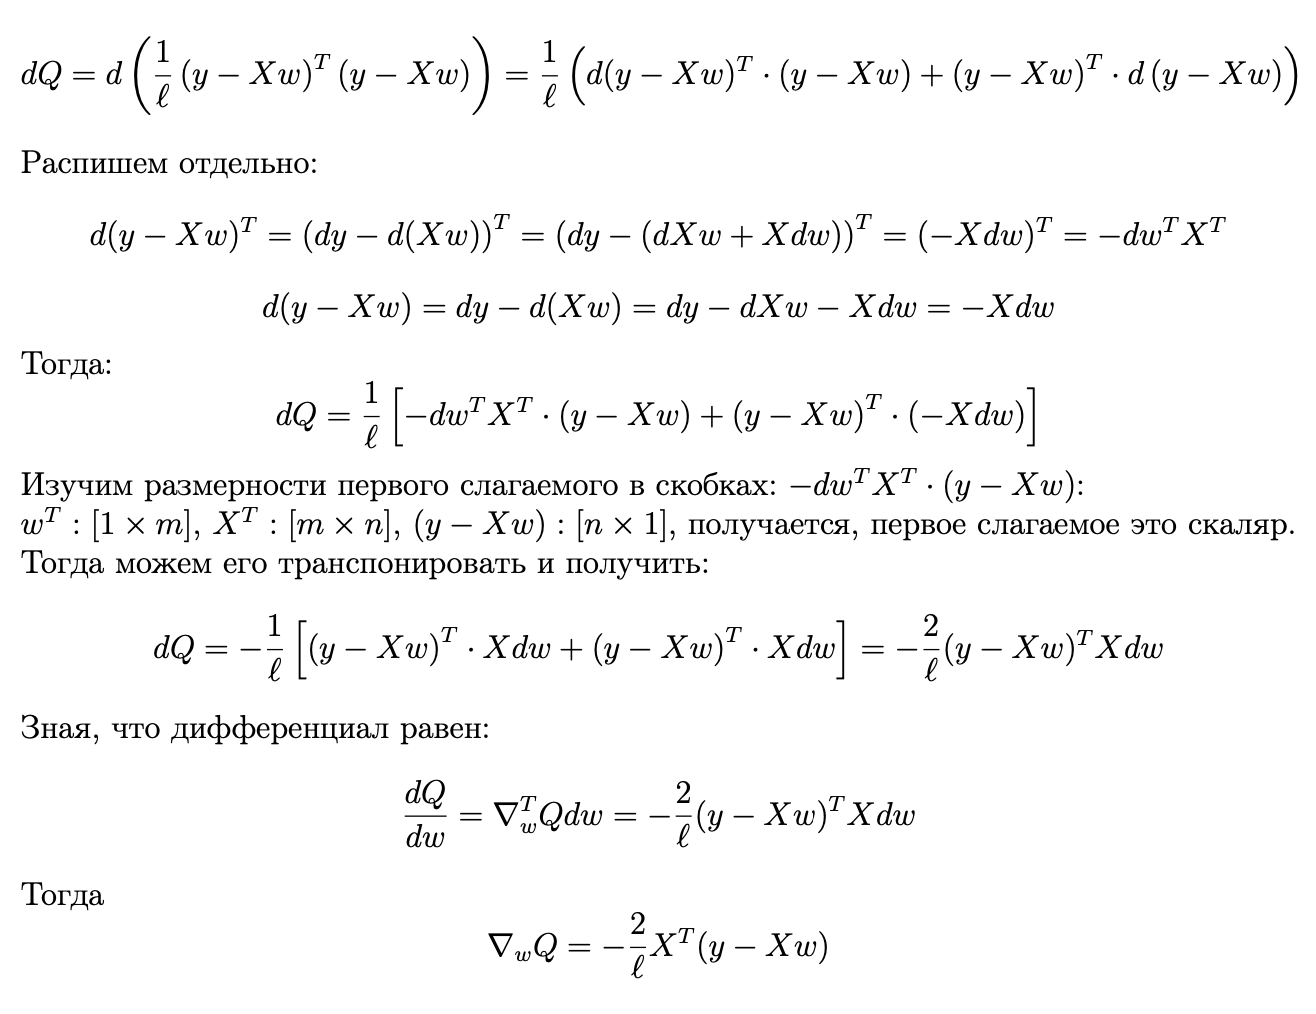

### Задание 1.1. Родительский класс BaseDescent.

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent.

Реализуйте полный градиентный спуск в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$. Кроме того, соответственно своему названию, она должна обновлять веса. 

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent.

Реализуйте стохастический градиентный спуск в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения **(обратите внимание, что в данном домашнем задании длина шага не фиксируется)**. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation).

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Веса модели надо обновлять внутри функции `update_weights`, она неспроста так называется
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

In [5]:
%autoreload 2

import numpy as np
import pandas as pd 

from descents import get_descent, LossFunction
from linear_regression import LinearRegression

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

from tqdm import tqdm
import time

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

## Задание 3. Проверка кода

In [1]:
%load_ext autoreload

In [66]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [67]:
descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension
    }
}

descent = get_descent(descent_config)
diff = descent.step(x, y)
gradient = descent.calc_gradient(x, y)
predictions = descent.predict(x)

In [6]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [68]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/70588/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **[VanillaGradientDescent](https://contest.yandex.ru/contest/70588/run-report/135752224/)**:


* **[StochasticDescent](https://contest.yandex.ru/contest/70588/run-report/135752232/)**:


* **[MomentumDescent](https://contest.yandex.ru/contest/70588/run-report/135752236/)**:


* **[Adam](https://contest.yandex.ru/contest/70588/run-report/135752258/)**:


* **[LinearRegression](https://contest.yandex.ru/contest/70588/run-report/135752266/)**:

## Задание 4. Работа с данными

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте (и напишите): какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте (и напишите): какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [6]:
data = pd.read_csv('autos.csv')

In [7]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


In [8]:
data.shape

(241190, 10)

<Axes: >

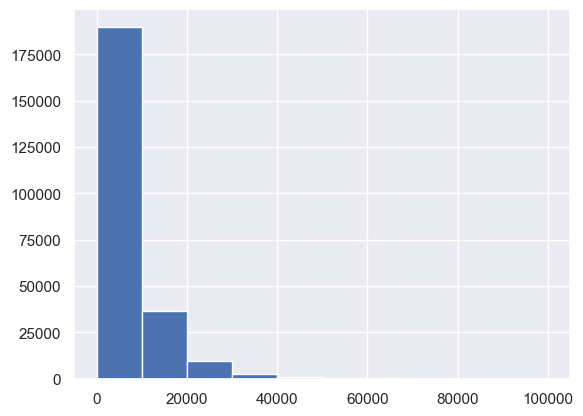

In [9]:
data['price'].hist()

Отличный кандидат на логарифмирование

<Axes: >

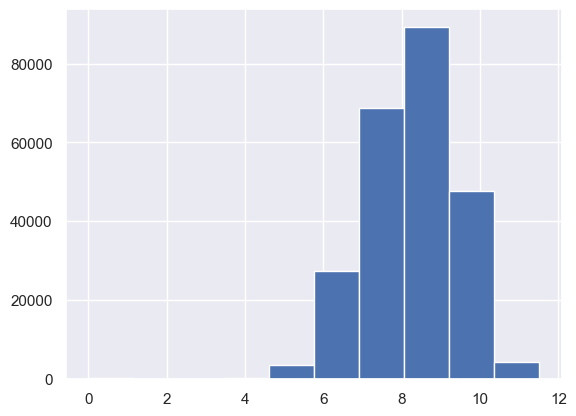

In [10]:
data['log_price'] = np.log(data['price'])
data['log_price'].hist()

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [11]:
categorical = ['brand', 'model', 'gearbox', 'fuelType', 'notRepairedDamage']
numeric = ['powerPS', 'kilometer']
other = ['low_mileage']

In [12]:
def trand_by_feature(feature_name, target_name):
    agg_data = data.groupby(feature_name)[target_name].mean().reset_index()

    x = agg_data[feature_name].values
    y = agg_data[target_name].values
    
    coeffs = np.polyfit(x, y, deg=1)
    trend = np.poly1d(coeffs) 
    
    plt.plot(x, y, label='Средняя цена')
    plt.plot(x, trend(x), color='red', linewidth=2, label='Линия тренда')
    
    plt.xlabel(f'{feature_name}')
    plt.ylabel('Средняя цена')
    plt.title(f'Зависимость средней цены от {feature_name}')
    plt.grid(True)
    plt.legend()
    plt.show()

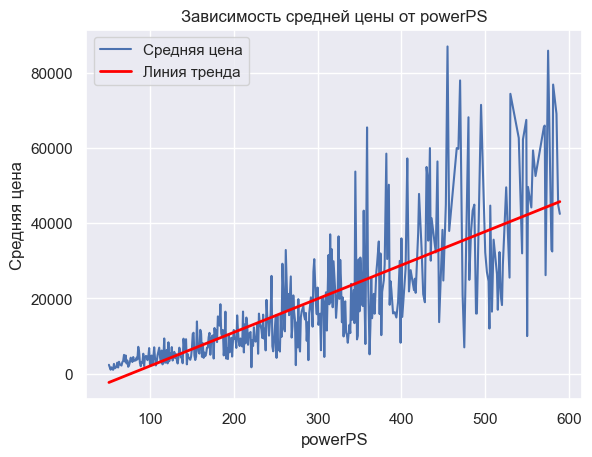

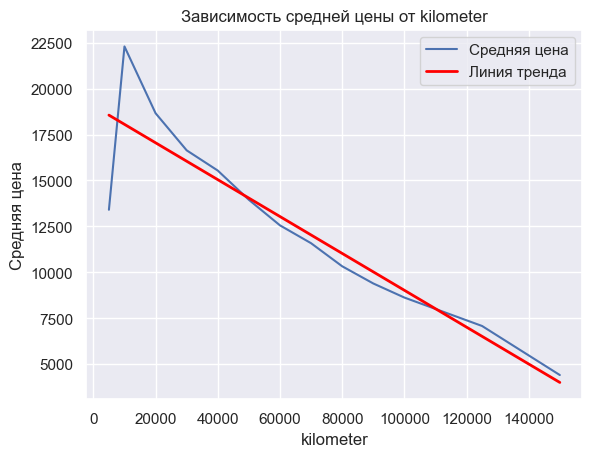

In [13]:
target_name = 'price'
for feature in numeric:
    trand_by_feature(feature, target_name)

**Числовые признаки:**
- powerPS: есть линейная зависимость от таргета
- kilometer: на большей части значений фичи есть линейная зависимость от таргета, добавим отдельный бинарный признак, чтобы отсечь данные до "перелома"
- autoAgeMonths: зависимость не похожа на линейную, удалим этот признак

In [14]:
agg_data = data.groupby('kilometer')['price'].mean().reset_index()
max_row = agg_data.loc[agg_data['price'].idxmax()]
print(f"Максимальная средняя цена достигается при пробеге: {max_row['kilometer']}")

Максимальная средняя цена достигается при пробеге: 10000.0


In [15]:
data['low_mileage'] = (data['kilometer'] <= 10000).astype(int)

In [16]:
data['bias'] = 1
other += ['bias']

x = data[categorical + numeric + other]
y = data['log_price']


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

## Задание 5. Сравнение методов градиентного спуска

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [95]:
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

lambda_grid = np.logspace(-5, 0, 20) 
methods = ['full', 'stochastic', 'momentum', 'adam']

results = {}
best_loss_histories = {}
dimension = X_train.shape[1]

for method in methods:
    print(f"Подбор параметров для метода: {method}")
    method_results = []
    
    for lambda_ in tqdm(lambda_grid):
        kwargs = {
            'dimension': dimension,
            'lambda_': lambda_
        }
        
        if method == 'stochastic':
            kwargs['batch_size'] = 50
        
        descent_config = {
            'descent_name': method,
            'kwargs': kwargs
        }
        
        model = LinearRegression(descent_config, tolerance=1e-4, max_iter=1000)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        r2_val = r2_score(y_val, y_val_pred)
        
        method_results.append({
            'lambda': lambda_,
            'r2_val': r2_val,
            'iterations': len(model.loss_history) - 1,
            'model': model,
            'loss_history': model.loss_history.copy()  # Сохраняем копию истории потерь
        })
    
    best_model = max(method_results, key=lambda x: x['r2_val'])
    best_loss_histories[method] = best_model['loss_history']  # Сохраняем историю потерь лучшей модели
    
    y_train_pred = best_model['model'].predict(X_train)
    y_test_pred = best_model['model'].predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results[method] = {
        'best_lambda': best_model['lambda'],
        'iterations': best_model['iterations'],
        'r2_train': r2_train,
        'r2_val': best_model['r2_val'],
        'r2_test': r2_test
    }
    
    print(f"Лучшая lambda для {method}: {best_model['lambda']:.6f}")
    print(f"Количество итераций: {best_model['iterations']}")
    print(f"R² (train): {r2_train:.4f}")
    print(f"R² (val): {best_model['r2_val']:.4f}")
    print(f"R² (test): {r2_test:.4f}")
    print("-" * 50)

Подбор параметров для метода: full


100%|██████████| 20/20 [00:01<00:00, 17.71it/s]


Лучшая lambda для full: 1.000000
Количество итераций: 45
R² (train): 0.5799
R² (val): 0.5737
R² (test): 0.5839
--------------------------------------------------
Подбор параметров для метода: stochastic


100%|██████████| 20/20 [00:01<00:00, 12.01it/s]


Лучшая lambda для stochastic: 0.545559
Количество итераций: 277
R² (train): 0.5801
R² (val): 0.5774
R² (test): 0.5829
--------------------------------------------------
Подбор параметров для метода: momentum


100%|██████████| 20/20 [00:02<00:00,  8.08it/s]


Лучшая lambda для momentum: 1.000000
Количество итераций: 127
R² (train): 0.6506
R² (val): 0.6456
R² (test): 0.6555
--------------------------------------------------
Подбор параметров для метода: adam


100%|██████████| 20/20 [00:05<00:00,  3.36it/s]

Лучшая lambda для adam: 1.000000
Количество итераций: 132
R² (train): 0.6625
R² (val): 0.6567
R² (test): 0.6676
--------------------------------------------------


In [96]:
results_df = pd.DataFrame({
    'Method': [],
    'Best Lambda': [],
    'Iterations': [],
    'R² (train)': [],
    'R² (val)': [],
    'R² (test)': []
})

for method, res in results.items():
    results_df = pd.concat([results_df, pd.DataFrame({
        'Method': [method],
        'Best Lambda': [res['best_lambda']],
        'Iterations': [res['iterations']],
        'R² (train)': [res['r2_train']],
        'R² (val)': [res['r2_val']],
        'R² (test)': [res['r2_test']]
    })], ignore_index=True)

print("\nСводная таблица результатов:")
results_df


Сводная таблица результатов:


,Method,Best Lambda,Iterations,R² (train),R² (val),R² (test)
0,full,1.000000,45.0,0.579885,0.573700,0.583908
1,stochastic,0.545559,277.0,0.580130,0.577387,0.582853
2,momentum,1.000000,127.0,0.650554,0.645583,0.655484
3,adam,1.000000,132.0,0.662456,0.656744,0.667562


### Задание 5.2. Сравнение методов

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

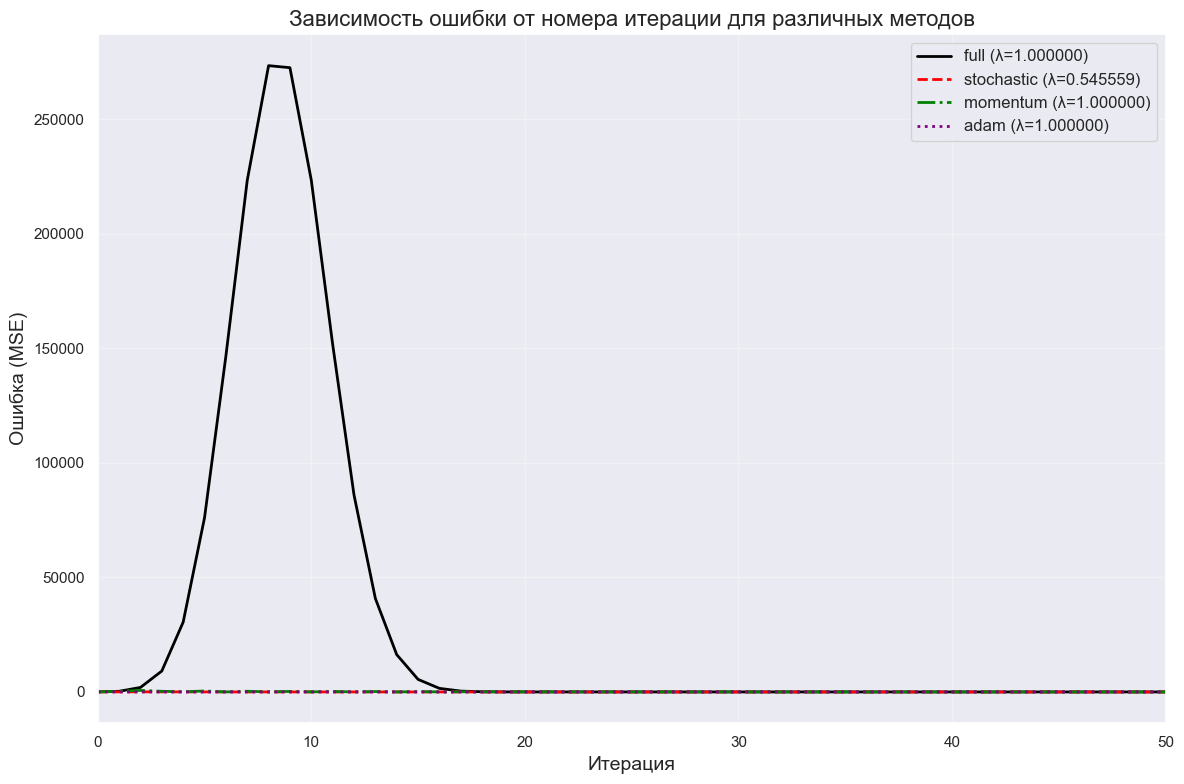


Сравнение методов градиентного спуска:
     Метод  Лучшая λ  Итерации  R² (train)  R² (val)  R² (test)  Скорость сходимости
      adam  1.000000       130    0.662662  0.656900   0.667780             1.007692
  momentum  1.000000       127    0.650320  0.644246   0.655282             1.031496
stochastic  0.545559       210    0.582917  0.577566   0.587034             0.623810
      full  1.000000        50    0.577549  0.574330   0.578338             2.620000


In [25]:
plt.figure(figsize=(12, 8))

max_iterations = 0
colors = {
    'vanilla': 'blue',
    'stochastic': 'red',
    'momentum': 'green',
    'adam': 'purple'
}

styles = {
    'vanilla': '-',
    'stochastic': '--',
    'momentum': '-.',
    'adam': ':'
}

for method, res in results.items():
    loss_history = best_loss_histories[method]
    max_iterations = max(max_iterations, len(loss_history))
    iterations = np.arange(len(loss_history))
    
    plt.plot(
        iterations, 
        loss_history, 
        label=f"{method} (λ={res['best_lambda']:.6f})", 
        color=colors.get(method, 'black'),
        linestyle=styles.get(method, '-'),
        linewidth=2
    )

plt.xlabel('Итерация', fontsize=14)
plt.ylabel('Ошибка (MSE)', fontsize=14)
plt.title('Зависимость ошибки от номера итерации для различных методов', fontsize=16)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

plt.xlim(0, min(max_iterations, 50)) 
plt.tight_layout()
plt.savefig('gradient_descent_comparison.png', dpi=300)
plt.show()

print("\nСравнение методов градиентного спуска:")
comparison_df = pd.DataFrame({
    'Метод': [method for method in results.keys()],
    'Лучшая λ': [res['best_lambda'] for res in results.values()],
    'Итерации': [res['iterations'] for res in results.values()],
    'R² (train)': [res['r2_train'] for res in results.values()],
    'R² (val)': [res['r2_val'] for res in results.values()],
    'R² (test)': [res['r2_test'] for res in results.values()],
    'Скорость сходимости': [len(best_loss_histories[method]) / res['iterations'] for res in results.values()]
})

comparison_df = comparison_df.sort_values('R² (test)', ascending=False)

print(comparison_df.to_string(index=False, float_format=lambda x: f"{x:.6f}"))

## Задание 6. Стохастический градиентный спуск и размер батча

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча. _(под сходимостью понимается достижение критерия останова)_
* Постройте график зависимости времени до сходимости от размера батча.

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

In [107]:
optimal_lambda = results['stochastic']['best_lambda']
batch_results = {
    'batch_size': [],
    'avg_iterations': [],
    'std_iterations': [],
    'avg_time': [],
    'std_time': [],
    'avg_r2_train': [],
    'avg_r2_test': []
}


In [108]:
batch_sizes = np.arange(5, 500, 10)

num_runs = 10

optimal_lambda = results['stochastic']['best_lambda']

batch_results = {
    'batch_size': [],
    'avg_iterations': [],
    'std_iterations': [],
    'avg_time': [],
    'std_time': [],
    'avg_r2_train': [],
    'avg_r2_test': []
}

for batch_size in tqdm(batch_sizes, desc="Testing batch sizes"):
    iterations_list = []
    times_list = []
    r2_train_list = []
    r2_test_list = []
    
    for run in range(num_runs):
        descent_config = {
            'descent_name': 'stochastic',
            'kwargs': {
                'dimension': dimension,
                'lambda_': optimal_lambda,
                'batch_size': batch_size
            }
        }
        
        model = LinearRegression(descent_config, tolerance=1e-4, max_iter=1000)
        
        start_time = time.time()
        
        model.fit(X_train, y_train)
        
        end_time = time.time()
        training_time = end_time - start_time
        
        iterations = len(model.loss_history) - 1
        
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
        
        iterations_list.append(iterations)
        times_list.append(training_time)
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)
    
    batch_results['batch_size'].append(batch_size)
    batch_results['avg_iterations'].append(np.mean(iterations_list))
    batch_results['std_iterations'].append(np.std(iterations_list))
    batch_results['avg_time'].append(np.mean(times_list))
    batch_results['std_time'].append(np.std(times_list))
    batch_results['avg_r2_train'].append(np.mean(r2_train_list))
    batch_results['avg_r2_test'].append(np.mean(r2_test_list))

batch_df = pd.DataFrame(batch_results)
batch_df

Testing batch sizes: 100%|██████████| 50/50 [01:41<00:00,  2.03s/it]


,batch_size,avg_iterations,std_iterations,avg_time,std_time,avg_r2_train,avg_r2_test
0,5,460.2,153.458659,0.671699,0.220200,0.533017,0.535943
1,15,490.3,88.244037,0.696528,0.112959,0.582908,0.585740
2,25,386.9,34.118763,0.547595,0.054028,0.589459,0.593582
3,35,309.7,36.690735,0.448891,0.071124,0.585019,0.588930
4,45,268.1,54.524215,0.398010,0.080430,0.581154,0.584758
5,55,234.3,48.764844,0.346057,0.065923,0.579098,0.583340
6,65,216.8,33.522530,0.306306,0.049950,0.580479,0.583506
7,75,200.8,28.124011,0.287294,0.036549,0.580537,0.584211
8,85,193.2,22.386603,0.285540,0.046607,0.577682,0.581492
9,95,175.2,35.993888,0.262935,0.052638,0.580030,0.583870


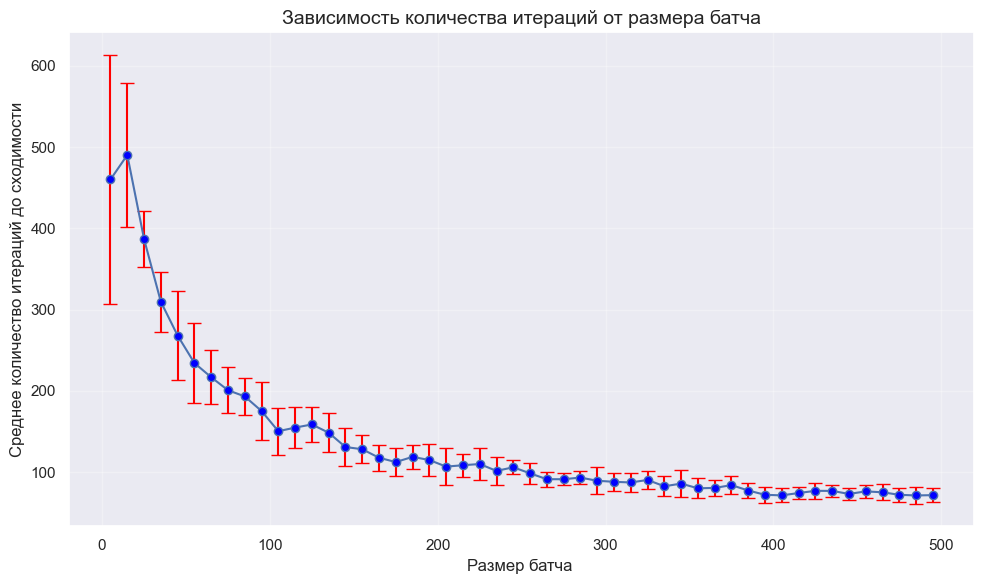

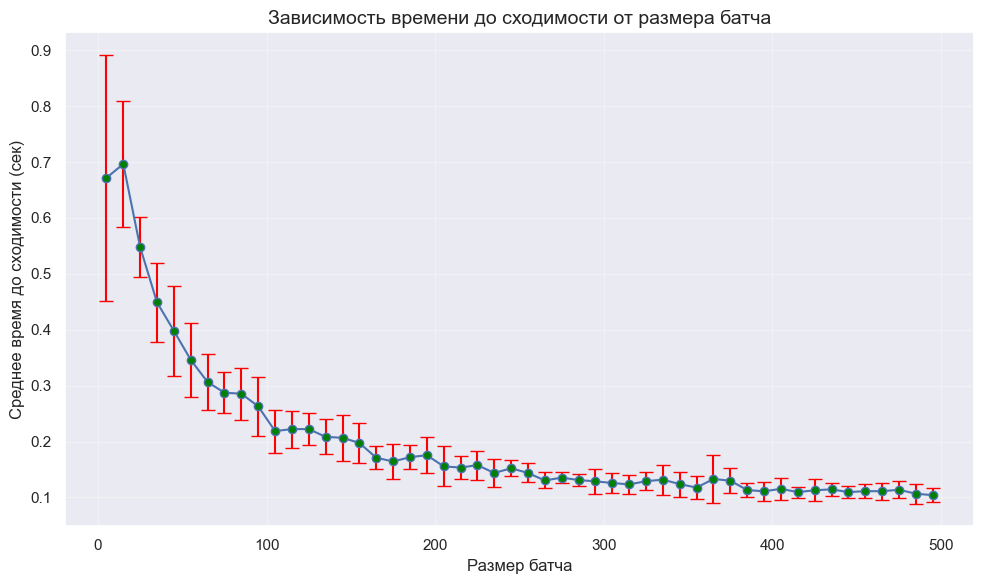

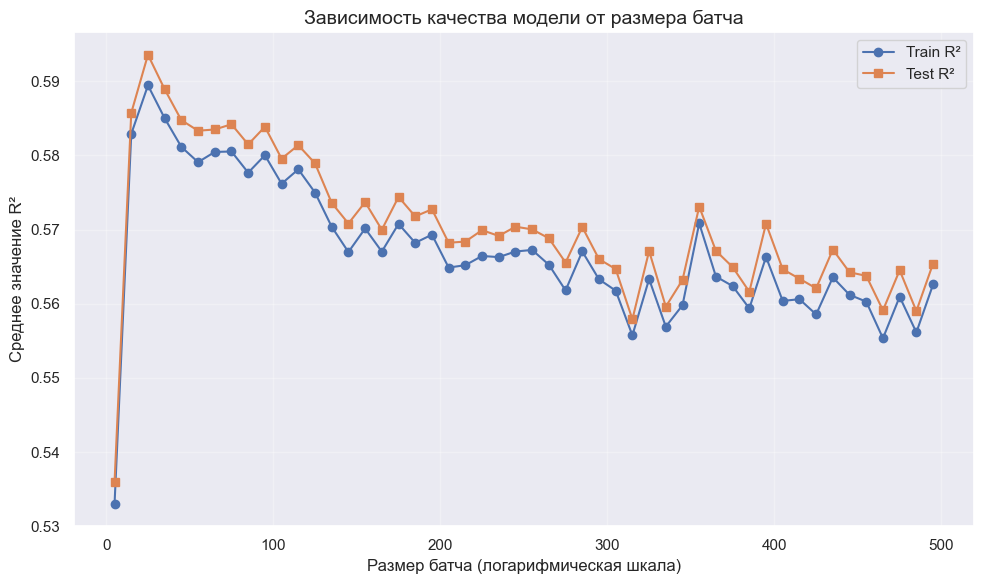

In [109]:
plt.figure(figsize=(10, 6))
plt.errorbar(
    batch_df['batch_size'], 
    batch_df['avg_iterations'], 
    yerr=batch_df['std_iterations'],
    fmt='o-', 
    capsize=5, 
    ecolor='red', 
    markerfacecolor='blue'
)

plt.xlabel('Размер батча ', fontsize=12)
plt.ylabel('Среднее количество итераций до сходимости', fontsize=12)
plt.title('Зависимость количества итераций от размера батча', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('batch_size_vs_iterations.png', dpi=300)
plt.show()

plt.figure(figsize=(10, 6))
plt.errorbar(
    batch_df['batch_size'], 
    batch_df['avg_time'], 
    yerr=batch_df['std_time'],
    fmt='o-', 
    capsize=5, 
    ecolor='red', 
    markerfacecolor='green'
)

plt.xlabel('Размер батча', fontsize=12)
plt.ylabel('Среднее время до сходимости (сек)', fontsize=12)
plt.title('Зависимость времени до сходимости от размера батча', fontsize=14)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('batch_size_vs_time.png', dpi=300)
plt.show()


plt.figure(figsize=(10, 6))
plt.plot(batch_df['batch_size'], batch_df['avg_r2_train'], 'o-', label='Train R²')
plt.plot(batch_df['batch_size'], batch_df['avg_r2_test'], 's-', label='Test R²')
plt.xlabel('Размер батча (логарифмическая шкала)', fontsize=12)
plt.ylabel('Среднее значение R²', fontsize=12)
plt.title('Зависимость качества модели от размера батча', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('batch_size_vs_r2.png', dpi=300)
plt.show()

## Задание 7. Регуляризация

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.
Вставьте ссылку на успешную посылку:

* **BaseDescentReg**:

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

In [26]:
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

lambda_grid = np.logspace(-5, 0, 10)  
mu_grid = np.logspace(-2, 2, 5)  

methods = ['full', 'stochastic', 'momentum', 'adam']
reg_results = {}
best_loss_histories = {}
dimension = X_train.shape[1]

for method in methods:
    print(f"Подбор параметров для метода: {method}")
    method_results = []
    
    for lambda_ in tqdm(lambda_grid, desc="Lambda"):
        for mu in mu_grid:
            kwargs = {
                'dimension': dimension,
                'lambda_': lambda_,
                'mu': mu
            }
            
            if method == 'stochastic':
                kwargs['batch_size'] = 50
            
            descent_config = {
                'descent_name': method,
                'regularized': True,
                'kwargs': kwargs 
            }
            
            model = LinearRegression(descent_config, tolerance=1e-4, max_iter=1000)
            model.fit(X_train, y_train)
            
            y_val_pred = model.predict(X_val)
            r2_val = r2_score(y_val, y_val_pred)
            
            method_results.append({
                'lambda': lambda_,
                'mu': mu,
                'r2_val': r2_val,
                'iterations': len(model.loss_history) - 1,
                'model': model,
                'loss_history': model.loss_history.copy()
            })
    
    best_model = max(method_results, key=lambda x: x['r2_val'])
    best_loss_histories[method] = best_model['loss_history']
    
    y_train_pred = best_model['model'].predict(X_train)
    y_test_pred = best_model['model'].predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    reg_results[method] = {
        'best_lambda': best_model['lambda'],
        'best_mu': best_model['mu'],
        'iterations': best_model['iterations'],
        'r2_train': r2_train,
        'r2_val': best_model['r2_val'],
        'r2_test': r2_test
    }
    
    print(f"Лучшая lambda для {method}: {best_model['lambda']:.6f}")
    print(f"Лучшая mu для {method}: {best_model['mu']:.6f}")
    print(f"Количество итераций: {best_model['iterations']}")
    print(f"R² (train): {r2_train:.4f}")
    print(f"R² (val): {best_model['r2_val']:.4f}")
    print(f"R² (test): {r2_test:.4f}")
    print("-" * 50)

Подбор параметров для метода: full


Lambda: 100%|██████████| 10/10 [00:03<00:00,  3.31it/s]


Лучшая lambda для full: 1.000000
Лучшая mu для full: 0.010000
Количество итераций: 49
R² (train): 0.5806
R² (val): 0.5760
R² (test): 0.5835
--------------------------------------------------
Подбор параметров для метода: stochastic


Lambda: 100%|██████████| 10/10 [00:05<00:00,  1.73it/s]


Лучшая lambda для stochastic: 0.278256
Лучшая mu для stochastic: 100.000000
Количество итераций: 96
R² (train): 0.5285
R² (val): 0.5226
R² (test): 0.5302
--------------------------------------------------
Подбор параметров для метода: momentum


Lambda: 100%|██████████| 10/10 [00:06<00:00,  1.60it/s]


Лучшая lambda для momentum: 1.000000
Лучшая mu для momentum: 0.100000
Количество итераций: 127
R² (train): 0.6510
R² (val): 0.6455
R² (test): 0.6554
--------------------------------------------------
Подбор параметров для метода: adam


Lambda: 100%|██████████| 10/10 [00:14<00:00,  1.44s/it]

Лучшая lambda для adam: 1.000000
Лучшая mu для adam: 10.000000
Количество итераций: 116
R² (train): 0.6627
R² (val): 0.6571
R² (test): 0.6680
--------------------------------------------------


In [27]:
l2_results_df = pd.DataFrame({
    'Method': [],
    'L2 Best Lambda': [],
    'L2 Best Mu': [],
    'L2 Iterations': [],
    'L2 R² (train)': [],
    'L2 R² (val)': [],
    'L2 R² (test)': []
})

for method, res in reg_results.items():
    l2_results_df = pd.concat([l2_results_df, pd.DataFrame({
        'Method': [method],
        'L2 Best Lambda': [res['best_lambda']],
        'L2 Best Mu': [res['best_mu']],
        'L2 Iterations': [res['iterations']],
        'L2 R² (train)': [res['r2_train']],
        'L2 R² (val)': [res['r2_val']],
        'L2 R² (test)': [res['r2_test']]
    })], ignore_index=True)


Сводная таблица результатов:


,Method,L2 Best Lambda,L2 Best Mu,L2 Iterations,L2 R² (train),L2 R² (val),L2 R² (test)
0,full,1.000000,0.01,49.0,0.580614,0.575993,0.583493
1,stochastic,0.278256,100.00,96.0,0.528527,0.522605,0.530183
2,momentum,1.000000,0.10,127.0,0.650956,0.645497,0.655428
3,adam,1.000000,10.00,116.0,0.662748,0.657126,0.667989


In [28]:
result = results_df.merge(l2_results_df, on='Method')
result['Iterations Ration'] = result['Iterations'] / result['L2 Iterations']
result

,Method,Best Lambda,Iterations,R² (train),R² (val),R² (test),L2 Best Lambda,L2 Best Mu,L2 Iterations,L2 R² (train),L2 R² (val),L2 R² (test),Iterations Ration
0,full,1.000000,50.0,0.577549,0.574330,0.578338,1.000000,0.01,49.0,0.580614,0.575993,0.583493,1.020408
1,stochastic,0.545559,210.0,0.582917,0.577566,0.587034,0.278256,100.00,96.0,0.528527,0.522605,0.530183,2.187500
2,momentum,1.000000,127.0,0.650320,0.644246,0.655282,1.000000,0.10,127.0,0.650956,0.645497,0.655428,1.000000
3,adam,1.000000,130.0,0.662662,0.656900,0.667780,1.000000,10.00,116.0,0.662748,0.657126,0.667989,1.120690


## Задание 8. Альтернативная функция потерь

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регрессии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент _(требуется показать не только результат, но и промежуточные вычисления)_:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [30]:
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

lambda_grid = np.logspace(-5, 0, 20) 
methods = ['full', 'stochastic', 'momentum', 'adam']

log_cosh_results = {}
best_loss_histories = {}
dimension = X_train.shape[1]

for method in methods:
    print(f"Подбор параметров для метода: {method}")
    method_results = []
    
    for lambda_ in tqdm(lambda_grid):
        kwargs = {
            'dimension': dimension,
            'lambda_': lambda_,
            'loss_function': LossFunction.LogCosh
        }
        
        if method == 'stochastic':
            kwargs['batch_size'] = 50
        
        descent_config = {
            'descent_name': method,
            'kwargs': kwargs
        }
        
        model = LinearRegression(descent_config, tolerance=1e-4, max_iter=1000)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        r2_val = r2_score(y_val, y_val_pred)
        
        method_results.append({
            'lambda': lambda_,
            'r2_val': r2_val,
            'iterations': len(model.loss_history) - 1,
            'model': model,
            'loss_history': model.loss_history.copy()  # Сохраняем копию истории потерь
        })
    
    best_model = max(method_results, key=lambda x: x['r2_val'])
    best_loss_histories[method] = best_model['loss_history']  # Сохраняем историю потерь лучшей модели
    
    y_train_pred = best_model['model'].predict(X_train)
    y_test_pred = best_model['model'].predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    log_cosh_results[method] = {
        'best_lambda': best_model['lambda'],
        'iterations': best_model['iterations'],
        'r2_train': r2_train,
        'r2_val': best_model['r2_val'],
        'r2_test': r2_test
    }
    
    print(f"Лучшая lambda для {method}: {best_model['lambda']:.6f}")
    print(f"Количество итераций: {best_model['iterations']}")
    print(f"R² (train): {r2_train:.4f}")
    print(f"R² (val): {best_model['r2_val']:.4f}")
    print(f"R² (test): {r2_test:.4f}")
    print("-" * 50)

Подбор параметров для метода: full


100%|██████████| 20/20 [00:01<00:00, 16.32it/s]


Лучшая lambda для full: 1.000000
Количество итераций: 47
R² (train): 0.5768
R² (val): 0.5707
R² (test): 0.5798
--------------------------------------------------
Подбор параметров для метода: stochastic


100%|██████████| 20/20 [00:01<00:00, 12.61it/s]


Лучшая lambda для stochastic: 0.545559
Количество итераций: 265
R² (train): 0.5810
R² (val): 0.5767
R² (test): 0.5837
--------------------------------------------------
Подбор параметров для метода: momentum


100%|██████████| 20/20 [00:02<00:00,  8.54it/s]


Лучшая lambda для momentum: 1.000000
Количество итераций: 127
R² (train): 0.6508
R² (val): 0.6461
R² (test): 0.6562
--------------------------------------------------
Подбор параметров для метода: adam


100%|██████████| 20/20 [00:05<00:00,  3.53it/s]

Лучшая lambda для adam: 1.000000
Количество итераций: 134
R² (train): 0.6625
R² (val): 0.6569
R² (test): 0.6677
--------------------------------------------------


In [34]:
log_cosh_results_df = pd.DataFrame({
    'Method': [],
    'LogCosh Best Lambda': [],
    'LogCosh Iterations': [],
    'LogCosh R² (train)': [],
    'LogCosh R² (val)': [],
    'LogCosh R² (test)': []
})

for method, res in log_cosh_results.items():
    log_cosh_results_df = pd.concat([log_cosh_results_df, pd.DataFrame({
        'Method': [method],
        'LogCosh Best Lambda': [res['best_lambda']],
        'LogCosh Iterations': [res['iterations']],
        'LogCosh R² (train)': [res['r2_train']],
        'LogCosh R² (val)': [res['r2_val']],
        'LogCosh R² (test)': [res['r2_test']]
    })], ignore_index=True)

print("\nСводная таблица результатов:")
log_cosh_results_df


Сводная таблица результатов:


,Method,LogCosh Best Lambda,LogCosh Iterations,LogCosh R² (train),LogCosh R² (val),LogCosh R² (test)
0,full,1.000000,47.0,0.576763,0.570707,0.579791
1,stochastic,0.545559,265.0,0.581038,0.576681,0.583706
2,momentum,1.000000,127.0,0.650754,0.646062,0.656242
3,adam,1.000000,134.0,0.662509,0.656863,0.667669


In [35]:
result_diff_loss = results_df.merge(log_cosh_results_df, on='Method')
result_diff_loss

,Method,Best Lambda,Iterations,R² (train),R² (val),R² (test),LogCosh Best Lambda,LogCosh Iterations,LogCosh R² (train),LogCosh R² (val),LogCosh R² (test)
0,full,1.000000,50.0,0.577549,0.574330,0.578338,1.000000,47.0,0.576763,0.570707,0.579791
1,stochastic,0.545559,210.0,0.582917,0.577566,0.587034,0.545559,265.0,0.581038,0.576681,0.583706
2,momentum,1.000000,127.0,0.650320,0.644246,0.655282,1.000000,127.0,0.650754,0.646062,0.656242
3,adam,1.000000,130.0,0.662662,0.656900,0.667780,1.000000,134.0,0.662509,0.656863,0.667669


## Задание 9. Другие методы градиентного спуска. Другие функции потерь.

Дополнительная реализация других методов градиентного спуска:
- `AdaMax` (вариация Adam основанная на $l_{\infty}$),
- `Nadam` (вариация Adam совмещенная с методом импульса Нестерова),
- `AMSGrad` (ещё одна вариация Adam).

Дополнительные реализации функций потерь - **MAE** и **Huber**.

In [20]:
def run_method(method_name, loss_function_name, results, best_loss_histories, 
               X_train, y_train, X_val, y_val, X_test, y_test, 
               reg=False, lambda_grid=np.logspace(-5, 0, 20)):
    
    print(f"Подбор параметров для метода: {method_name}")
    print(f'Используемая loss-функция: {loss_function_name}')
    method_results = []
    dimension = X_train.shape[1]
    
    for lambda_ in tqdm(lambda_grid):
        kwargs = {
            'dimension': dimension,
            'lambda_': lambda_,
            'loss_function': getattr(LossFunction, loss_function_name)
        }
        
        if method_name == 'stochastic':
            kwargs['batch_size'] = 50
            
        if reg:
            kwargs['mu'] = 0.01 
            
        descent_config = {
            'descent_name': method_name,
            'regularized': reg,
            'kwargs': kwargs
        }
        
        model = LinearRegression(descent_config, tolerance=1e-4, max_iter=1000)
        model.fit(X_train, y_train)
        
        y_val_pred = model.predict(X_val)
        r2_val = r2_score(y_val, y_val_pred)
        
        method_results.append({
            'lambda': lambda_,
            'r2_val': r2_val,
            'iterations': len(model.loss_history) - 1,
            'model': model,
            'loss_history': model.loss_history.copy()
        })
    
    best_model = max(method_results, key=lambda x: x['r2_val'])
    best_loss_histories[(method_name, loss_function_name)] = best_model['loss_history']
    
    y_train_pred = best_model['model'].predict(X_train)
    y_test_pred = best_model['model'].predict(X_test)
    
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    results[(method_name, loss_function_name)] = {
        'best_lambda': best_model['lambda'],
        'iterations': best_model['iterations'],
        'r2_train': r2_train,
        'r2_val': best_model['r2_val'],
        'r2_test': r2_test
    }
    
    print(f"Лучшая lambda для {method_name}: {best_model['lambda']:.6f}")
    print(f"Количество итераций: {best_model['iterations']}")
    print(f"R² (train): {r2_train:.4f}")
    print(f"R² (val): {best_model['r2_val']:.4f}")
    print(f"R² (test): {r2_test:.4f}")
    print("-" * 50)

def methods_test(X_train, y_train, X_val, y_val, X_test, y_test):
    methods_name = ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'ams']
    loss_function_names = ['MSE', 'MAE', 'LogCosh', 'Huber']
    
    results = {}
    best_loss_histories = {}
    
    for method in methods_name:
        for loss_function in loss_function_names:
            run_method(method, loss_function, results, best_loss_histories, 
                      X_train, y_train, X_val, y_val, X_test, y_test, reg=False)
            
    return results, best_loss_histories

In [21]:
X_train_val, X_test, y_train_val, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [22]:
results, histories = methods_test(X_train, y_train, X_val, y_val, X_test, y_test)

Подбор параметров для метода: full
Используемая loss-функция: MSE


100%|██████████| 20/20 [00:01<00:00, 17.28it/s] 


Лучшая lambda для full: 1.000000
Количество итераций: 37
R² (train): 0.5347
R² (val): 0.5306
R² (test): 0.5384
--------------------------------------------------
Подбор параметров для метода: full
Используемая loss-функция: MAE


100%|██████████| 20/20 [00:01<00:00, 15.28it/s] 


Лучшая lambda для full: 1.000000
Количество итераций: 43
R² (train): 0.5381
R² (val): 0.5346
R² (test): 0.5399
--------------------------------------------------
Подбор параметров для метода: full
Используемая loss-функция: LogCosh


100%|██████████| 20/20 [00:01<00:00, 10.82it/s]


Лучшая lambda для full: 1.000000
Количество итераций: 25
R² (train): 0.5218
R² (val): 0.5192
R² (test): 0.5255
--------------------------------------------------
Подбор параметров для метода: full
Используемая loss-функция: Huber


100%|██████████| 20/20 [00:01<00:00, 11.07it/s] 


Лучшая lambda для full: 1.000000
Количество итераций: 48
R² (train): 0.4993
R² (val): 0.4950
R² (test): 0.5042
--------------------------------------------------
Подбор параметров для метода: stochastic
Используемая loss-функция: MSE


100%|██████████| 20/20 [00:00<00:00, 26.68it/s]


Лучшая lambda для stochastic: 1.000000
Количество итераций: 240
R² (train): 0.5800
R² (val): 0.5747
R² (test): 0.5813
--------------------------------------------------
Подбор параметров для метода: stochastic
Используемая loss-функция: MAE


100%|██████████| 20/20 [00:01<00:00, 19.51it/s] 


Лучшая lambda для stochastic: 1.000000
Количество итераций: 375
R² (train): 0.6005
R² (val): 0.5957
R² (test): 0.6037
--------------------------------------------------
Подбор параметров для метода: stochastic
Используемая loss-функция: LogCosh


100%|██████████| 20/20 [00:01<00:00, 15.12it/s] 


Лучшая lambda для stochastic: 1.000000
Количество итераций: 126
R² (train): 0.5523
R² (val): 0.5481
R² (test): 0.5547
--------------------------------------------------
Подбор параметров для метода: stochastic
Используемая loss-функция: Huber


100%|██████████| 20/20 [00:01<00:00, 17.05it/s] 


Лучшая lambda для stochastic: 1.000000
Количество итераций: 186
R² (train): 0.5653
R² (val): 0.5600
R² (test): 0.5683
--------------------------------------------------
Подбор параметров для метода: momentum
Используемая loss-функция: MSE


100%|██████████| 20/20 [00:02<00:00,  8.94it/s]


Лучшая lambda для momentum: 1.000000
Количество итераций: 103
R² (train): 0.6357
R² (val): 0.6305
R² (test): 0.6405
--------------------------------------------------
Подбор параметров для метода: momentum
Используемая loss-функция: MAE


100%|██████████| 20/20 [00:02<00:00,  7.58it/s]


Лучшая lambda для momentum: 1.000000
Количество итераций: 142
R² (train): 0.6292
R² (val): 0.6238
R² (test): 0.6345
--------------------------------------------------
Подбор параметров для метода: momentum
Используемая loss-функция: LogCosh


100%|██████████| 20/20 [00:03<00:00,  5.95it/s]


Лучшая lambda для momentum: 1.000000
Количество итераций: 118
R² (train): 0.6197
R² (val): 0.6157
R² (test): 0.6250
--------------------------------------------------
Подбор параметров для метода: momentum
Используемая loss-функция: Huber


100%|██████████| 20/20 [00:03<00:00,  5.70it/s]


Лучшая lambda для momentum: 1.000000
Количество итераций: 127
R² (train): 0.6197
R² (val): 0.6147
R² (test): 0.6252
--------------------------------------------------
Подбор параметров для метода: adam
Используемая loss-функция: MSE


100%|██████████| 20/20 [00:05<00:00,  3.40it/s]


Лучшая lambda для adam: 1.000000
Количество итераций: 112
R² (train): 0.6622
R² (val): 0.6566
R² (test): 0.6677
--------------------------------------------------
Подбор параметров для метода: adam
Используемая loss-функция: MAE


100%|██████████| 20/20 [00:11<00:00,  1.77it/s]


Лучшая lambda для adam: 1.000000
Количество итераций: 1000
R² (train): 0.6571
R² (val): 0.6525
R² (test): 0.6625
--------------------------------------------------
Подбор параметров для метода: adam
Используемая loss-функция: LogCosh


100%|██████████| 20/20 [00:11<00:00,  1.79it/s]


Лучшая lambda для adam: 1.000000
Количество итераций: 130
R² (train): 0.6618
R² (val): 0.6565
R² (test): 0.6672
--------------------------------------------------
Подбор параметров для метода: adam
Используемая loss-функция: Huber


100%|██████████| 20/20 [00:10<00:00,  1.95it/s]


Лучшая lambda для adam: 1.000000
Количество итераций: 128
R² (train): 0.6616
R² (val): 0.6565
R² (test): 0.6672
--------------------------------------------------
Подбор параметров для метода: nadam
Используемая loss-функция: MSE


100%|██████████| 20/20 [00:05<00:00,  3.51it/s]


Лучшая lambda для nadam: 1.000000
Количество итераций: 107
R² (train): 0.6630
R² (val): 0.6573
R² (test): 0.6681
--------------------------------------------------
Подбор параметров для метода: nadam
Используемая loss-функция: MAE


100%|██████████| 20/20 [00:14<00:00,  1.40it/s]


Лучшая lambda для nadam: 1.000000
Количество итераций: 1000
R² (train): 0.6571
R² (val): 0.6525
R² (test): 0.6625
--------------------------------------------------
Подбор параметров для метода: nadam
Используемая loss-функция: LogCosh


100%|██████████| 20/20 [00:10<00:00,  1.83it/s]


Лучшая lambda для nadam: 1.000000
Количество итераций: 123
R² (train): 0.6619
R² (val): 0.6568
R² (test): 0.6673
--------------------------------------------------
Подбор параметров для метода: nadam
Используемая loss-функция: Huber


100%|██████████| 20/20 [00:10<00:00,  1.94it/s]


Лучшая lambda для nadam: 1.000000
Количество итераций: 100
R² (train): 0.6618
R² (val): 0.6566
R² (test): 0.6672
--------------------------------------------------
Подбор параметров для метода: adamax
Используемая loss-функция: MSE


100%|██████████| 20/20 [00:05<00:00,  3.58it/s]


Лучшая lambda для adamax: 1.000000
Количество итераций: 102
R² (train): 0.6613
R² (val): 0.6556
R² (test): 0.6667
--------------------------------------------------
Подбор параметров для метода: adamax
Используемая loss-функция: MAE


100%|██████████| 20/20 [00:09<00:00,  2.14it/s]


Лучшая lambda для adamax: 1.000000
Количество итераций: 197
R² (train): 0.6568
R² (val): 0.6521
R² (test): 0.6623
--------------------------------------------------
Подбор параметров для метода: adamax
Используемая loss-функция: LogCosh


100%|██████████| 20/20 [00:11<00:00,  1.76it/s]


Лучшая lambda для adamax: 1.000000
Количество итераций: 96
R² (train): 0.6613
R² (val): 0.6562
R² (test): 0.6666
--------------------------------------------------
Подбор параметров для метода: adamax
Используемая loss-функция: Huber


100%|██████████| 20/20 [00:11<00:00,  1.76it/s]


Лучшая lambda для adamax: 1.000000
Количество итераций: 102
R² (train): 0.6608
R² (val): 0.6559
R² (test): 0.6661
--------------------------------------------------
Подбор параметров для метода: ams
Используемая loss-функция: MSE


100%|██████████| 20/20 [00:04<00:00,  4.77it/s]


Лучшая lambda для ams: 0.088587
Количество итераций: 104
R² (train): 0.6610
R² (val): 0.6553
R² (test): 0.6660
--------------------------------------------------
Подбор параметров для метода: ams
Используемая loss-функция: MAE


100%|██████████| 20/20 [00:09<00:00,  2.09it/s]


Лучшая lambda для ams: 1.000000
Количество итераций: 836
R² (train): 0.6571
R² (val): 0.6526
R² (test): 0.6625
--------------------------------------------------
Подбор параметров для метода: ams
Используемая loss-функция: LogCosh


100%|██████████| 20/20 [00:08<00:00,  2.27it/s]


Лучшая lambda для ams: 1.000000
Количество итераций: 253
R² (train): 0.6617
R² (val): 0.6565
R² (test): 0.6670
--------------------------------------------------
Подбор параметров для метода: ams
Используемая loss-функция: Huber


100%|██████████| 20/20 [00:08<00:00,  2.30it/s]

Лучшая lambda для ams: 1.000000
Количество итераций: 158
R² (train): 0.6616
R² (val): 0.6564
R² (test): 0.6671
--------------------------------------------------


In [40]:
from itertools import product

methods_name = ['full', 'stochastic', 'momentum', 'adam', 'nadam', 'adamax', 'ams']
loss_function_names = ['MSE', 'MAE', 'LogCosh', 'Huber']

compare_dict = {}

for method, loss in product(methods_name, loss_function_names):
    compare_dict[method] = compare_dict.get(method, {})
    compare_dict[method][loss] = compare_dict[method].get(loss, {})
    compare_dict[method][loss]['iteration'] = results[(method, loss)]['iterations']
    compare_dict[method][loss]['test_metric'] = round(results[(method, loss)]['r2_test'], 5)

In [44]:
records = []
for method, loss_dict in compare_dict.items():
    for loss_name, metrics in loss_dict.items():
        records.append({
            'method': method,
            'loss_function': loss_name,
            'iterations': metrics['iteration'],
            'r2_test': metrics['test_metric']
        })

compare_df = pd.DataFrame(records)

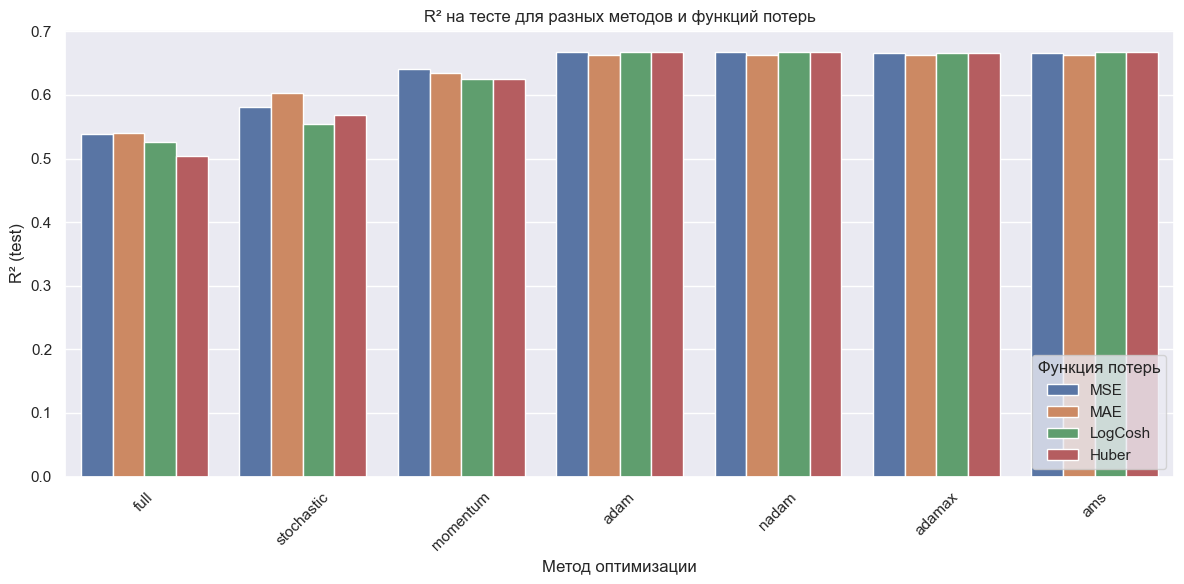

In [49]:
plt.figure(figsize=(12, 6))
sns.barplot(data=compare_df, x='method', y='r2_test', hue='loss_function')
plt.title('R² на тесте для разных методов и функций потерь')
plt.ylabel('R² (test)')
plt.xlabel('Метод оптимизации')
plt.legend(title='Функция потерь', loc='lower right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

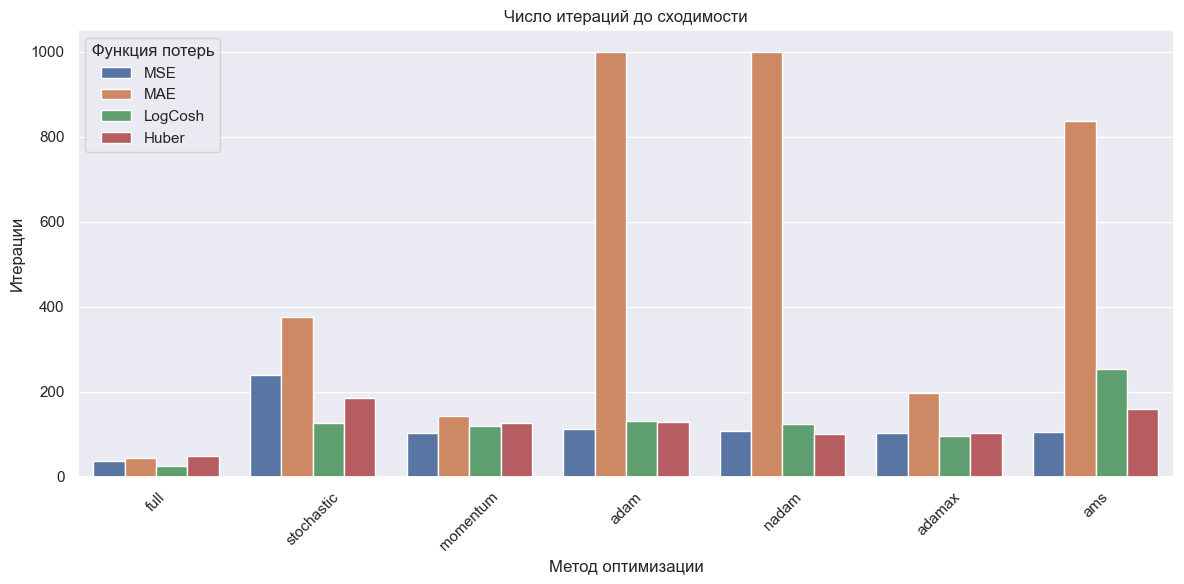

In [50]:
plt.figure(figsize=(12, 6))
sns.barplot(data=compare_df, x='method', y='iterations', hue='loss_function')
plt.title('Число итераций до сходимости')
plt.ylabel('Итерации')
plt.xlabel('Метод оптимизации')
plt.legend(title='Функция потерь')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Задание 10. Демонстрация сильных и слабых сторон различных методов градиентного спуска и функций потерь на синтетических данных.

In [661]:
from data_generator import DataGenerator
from linear_regression import LinearRegression
from descents import get_descent, LossFunction

from sklearn.metrics import mean_squared_error

### 10.0 Генерация данных

**Проверка на адекватность:**

Сгенерируем данные с линейной зависимостью (с возможностью добавлять Гауссовский шум) и запустим любую из реализаций градиентного спуска.
Ожидаемый результат: 
- ```R² = 1``` (в случае запуска без шума)
- ```mse(true_weights, regression_weights) = 0```

MSE между истиными весами, использованными при генерации и обученными весами:
0.04
R² на том же датасете, что и обучение (ожидаем 1)
0.9610585175175493


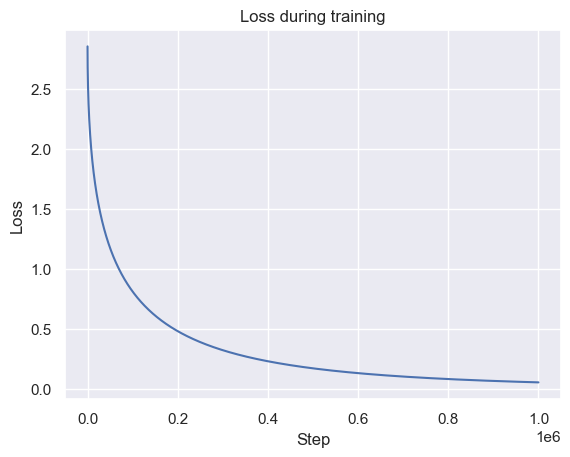

In [204]:
dg = DataGenerator(1234)
linear_X, linear_y, linear_weights = dg.generate_linear_data(noise=0)

means = np.mean(linear_X, axis=0)
stds = np.std(linear_X, axis=0)
linear_X = (linear_X - means) / stds
linear_X = np.column_stack([np.ones(linear_X.shape[0]), linear_X])

dimension = linear_X.shape[1]
max_iter = 10 ** 6
tolerance = 0

descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension,
        # 'batch_size': 50
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(linear_X, linear_y)
predictions = regression.predict(linear_X)

linear_weights_scaled = np.concatenate([
    [linear_weights[0] - np.sum(linear_weights[1:] * means / stds)],
    linear_weights[1:] / stds
])

print('MSE между истиными весами, использованными при генерации и обученными весами:')
print(round(mean_squared_error(linear_weights_scaled, regression.descent.w), 3))

print('R² на том же датасете, что и обучение (ожидаем 1)')
print(r2_score(linear_y, predictions))

plt.plot(regression.loss_history)
plt.title("Loss during training")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.show()

А теперь все-таки разделим данные на train и test и чуть-чуть приблизимся к нормальным условиям: добавим шум (хоть и гауссовский)

MSE между истиными весами (корректировка на нормализацию признаков), использованными при генерации и обученными весами:
0.039
R² на тестовом датасете
0.964831655742532


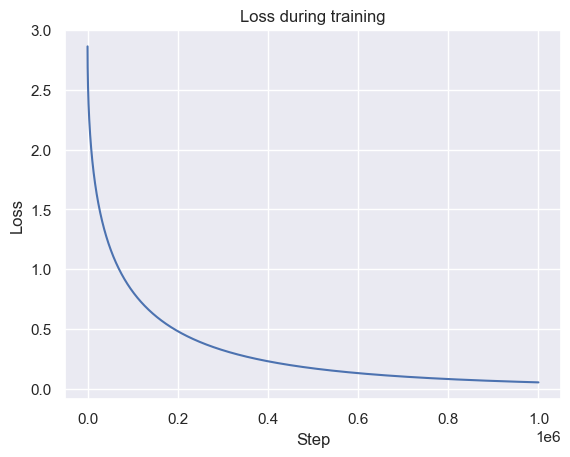

In [207]:
dg = DataGenerator(1234)
linear_X, linear_y, linear_weights = dg.generate_linear_data(noise=0)

X_train, X_test, y_train, y_test = train_test_split(
    linear_X, linear_y, test_size=0.01, random_state=42)

means_full, stds_full = np.mean(linear_X, axis=0), np.std(linear_X, axis=0)
means_train, stds_train = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train = (X_train - means_train) / stds_train
X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])

X_test = (X_test - means_train) / stds_train
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])

dimension = X_train.shape[1]
max_iter = 10 ** 6
tolerance = 0

descent_config = {
    'descent_name': 'full',
    'kwargs': {
        'dimension': dimension,
        # 'batch_size': 50
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(X_train, y_train)
predictions = regression.predict(X_test)

linear_weights_scaled = np.concatenate([
    [linear_weights[0] - np.sum(linear_weights[1:] * means_full / stds_full)],
    linear_weights[1:] / stds_full
])

print('MSE между истиными весами (корректировка на нормализацию признаков), использованными при генерации и обученными весами:')
print(round(mean_squared_error(linear_weights_scaled, regression.descent.w), 3))

print('R² на тестовом датасете')
print(r2_score(y_test, predictions))

plt.plot(regression.loss_history)
plt.title("Loss during training")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.show()

## Эксперименты с разными функциями потерь и разными "проблемами в данных"

### 10.1 Выбросы и разные функции потерь

Теперь сгенерируем данные с выбросами и сравним результаты одной и той же модели на одном и том же датасете при одинаковых параметрах (max_iter, noise), но обученных с использованием различных функций потерь **MSE, MAE, Huber, LogCosh**

Т.к. MSE штрафует за выбросы больше, чем MAE и Huber, то ожидаем, что при наличии выбросов в данных, модель, обученная на MSE лоссебудет хуже, чем при тех же условиях на MAE/Huber.

Смоделируем две ситуации:
- Выбросов относительно много (10%), но они небольшие (~5 раз)
- Выбросов мало (0.5%), но они большие (~100 раз)

In [380]:
# Данные

dg = DataGenerator(12)
outlier_X1, outlier_y1, outlier_weights1 = dg.generate_outliers_data(noise=0, outlier_scale=5, outlier_ratio=0.1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    outlier_X1, outlier_y1, test_size=0.2, random_state=42)

means_train1, stds_train1 = np.mean(X_train1, axis=0), np.std(X_train1, axis=0)
X_train1 = (X_train1 - means_train1) / stds_train1
X_train1 = np.column_stack([np.ones(X_train1.shape[0]), X_train1])

X_test1 = (X_test1 - means_train1) / stds_train1
X_test1 = np.column_stack([np.ones(X_test1.shape[0]), X_test1])

outlier_X2, outlier_y2, outlier_weights2 = dg.generate_outliers_data(noise=0, outlier_scale=100, outlier_ratio=0.005)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    outlier_X2, outlier_y2, test_size=0.2, random_state=42)

means_train2, stds_train2 = np.mean(X_train2, axis=0), np.std(X_train2, axis=0)
X_train2 = (X_train2 - means_train2) / stds_train2
X_train2 = np.column_stack([np.ones(X_train2.shape[0]), X_train2])

X_test2 = (X_test2 - means_train2) / stds_train2
X_test2 = np.column_stack([np.ones(X_test2.shape[0]), X_test2])

In [381]:
dimension = X_train.shape[1]
max_iter = 100
tolerance = 0

descent_config_MSE = {
    'descent_name': 'full',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

descent_config_MAE = {
    'descent_name': 'full',
    'loss_function': LossFunction.MAE,
    'kwargs': {
        'dimension': dimension,
    }
}

descent_config_Huber = {
    'descent_name': 'full',
    'loss_function': LossFunction.Huber,
    'kwargs': {
        'dimension': dimension,
    }
}

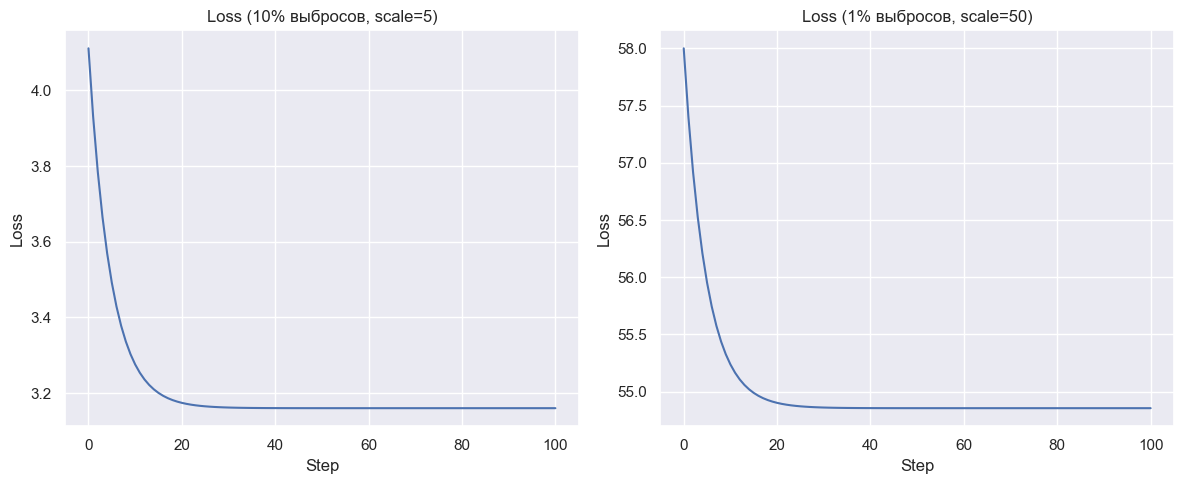

R² на тестовом датасете (10% выбросов, outlier_scale = 5)
0.15473558830268463
R² на тестовом датасете (0.5% выбросов, outlier_scale = 100)
0.5745666439548653


In [382]:
regression_MSE1 = LinearRegression(
    descent_config=descent_config_MSE,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_MSE1.fit(X_train1, y_train1)
predictions_MSE1 = regression_MSE1.predict(X_test1)


regression_MSE2 = LinearRegression(
    descent_config=descent_config_MSE,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_MSE2.fit(X_train2, y_train2)
predictions_MSE2 = regression_MSE2.predict(X_test2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 строка, 2 столбца

axes[0].plot(regression_MSE1.loss_history)
axes[0].set_title("Loss (10% выбросов, scale=5)")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Loss")

axes[1].plot(regression_MSE2.loss_history)
axes[1].set_title("Loss (1% выбросов, scale=50)")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")

plt.tight_layout()
plt.show()

print('R² на тестовом датасете (10% выбросов, outlier_scale = 5)')
print(r2_score(y_test1, predictions_MSE1))

print('R² на тестовом датасете (0.5% выбросов, outlier_scale = 100)')
print(r2_score(y_test2, predictions_MSE2))

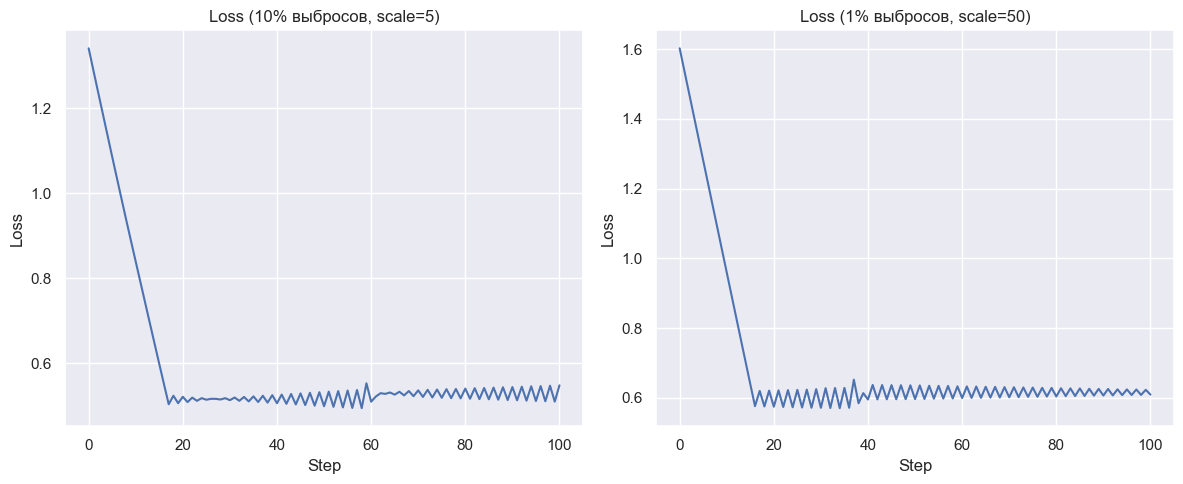

R² на тестовом датасете (10% выбросов, outlier_scale = 5)
0.15563188872862177
R² на тестовом датасете (0.5% выбросов, outlier_scale = 100)
0.9957421788012065


In [383]:
regression_MAE1 = LinearRegression(
    descent_config=descent_config_MAE,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_MAE1.fit(X_train1, y_train1)
predictions_MAE1 = regression_MAE1.predict(X_test1)


regression_MAE2 = LinearRegression(
    descent_config=descent_config_MAE,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_MAE2.fit(X_train2, y_train2)
predictions_MAE2 = regression_MAE2.predict(X_test2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 строка, 2 столбца

axes[0].plot(regression_MAE1.loss_history)
axes[0].set_title("Loss (10% выбросов, scale=5)")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Loss")

axes[1].plot(regression_MAE2.loss_history)
axes[1].set_title("Loss (1% выбросов, scale=50)")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")

plt.tight_layout()
plt.show()

print('R² на тестовом датасете (10% выбросов, outlier_scale = 5)')
print(r2_score(y_test1, predictions_MAE1))

print('R² на тестовом датасете (0.5% выбросов, outlier_scale = 100)')
print(r2_score(y_test2, predictions_MAE2))

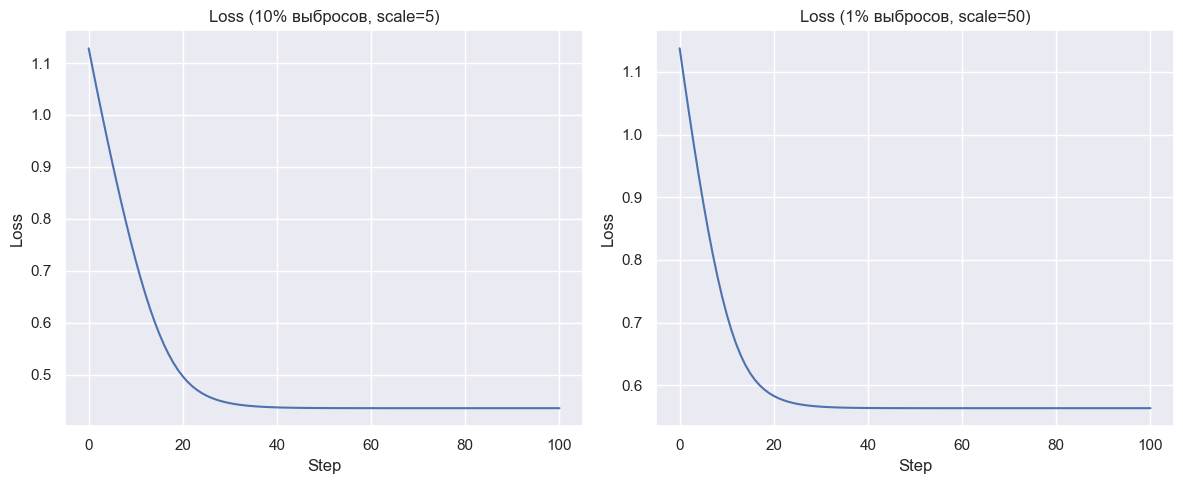

R² на тестовом датасете (10% выбросов, outlier_scale = 5)
0.15218003139436231
R² на тестовом датасете (0.5% выбросов, outlier_scale = 100)
0.9999542373601945


In [384]:
regression_Huber1 = LinearRegression(
    descent_config=descent_config_Huber,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_Huber1.fit(X_train1, y_train1)
predictions_Huber1 = regression_Huber1.predict(X_test1)

regression_Huber2 = LinearRegression(
    descent_config=descent_config_Huber,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_Huber2.fit(X_train2, y_train2)
predictions_Huber2 = regression_Huber2.predict(X_test2)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  # 1 строка, 2 столбца

axes[0].plot(regression_Huber1.loss_history)
axes[0].set_title("Loss (10% выбросов, scale=5)")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Loss")

axes[1].plot(regression_Huber2.loss_history)
axes[1].set_title("Loss (1% выбросов, scale=50)")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")

plt.tight_layout()
plt.show()

print('R² на тестовом датасете (10% выбросов, outlier_scale = 5)')
print(r2_score(y_test1, predictions_Huber1))

print('R² на тестовом датасете (0.5% выбросов, outlier_scale = 100)')
print(r2_score(y_test2, predictions_Huber2))

### Итого
1. Наличие даже небольшого количество выбросов (0.05%) очень сильно влияет на качество модели, обученной на MSE лоссе (R² = 0.57), т.к. объекты-выбросы начинают вносить очень большой вклад в значение loss-функции (среднее по объектам). MAE и Huber (с delta=1) не страдают от такой проблемы (R²=0.99), т.к. "меньше" учитывают выбросы (не возводят в квадрат)
2. Показательно, как ведет себя MAE на графике: "пила" -- артефакт sign в градиенте
3. Huber Loss обладает преимуществами MSE (дифференцируем, не шумит) и MAE (не так сильно штрафует за выбросы)
4. Линейная регрессия в целом чувствительна к выбросам: при наличии 10% данных, отличающихся в 5 раз от среднего, все модели показали плохой результат

-- Здесь я имею в виду, что модель больше обученная под выбросы однозначно хуже той, что смотрит на большую часть данных, однако, существуют задачи, для которых большой штраф за выбросы оправдан --

### 10.2 Мультимодальные данные и разные методы градиентного спуска

Зафиксируем функцию потерь -- **MSE**  
Сравним разные методы градиентного спуска:
- full
- stochastic
- adam/nadam/momentum (модификации, позволяющие преодолевать локальный минимум)

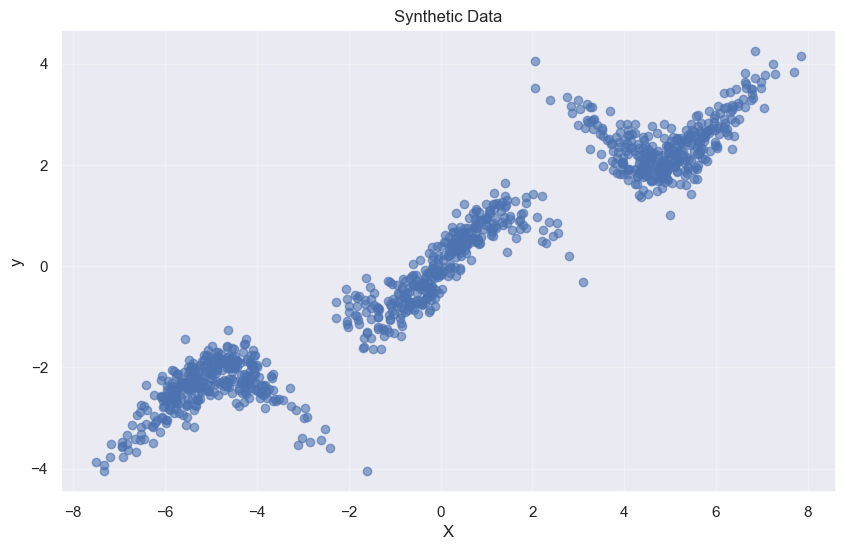

In [456]:
dg = DataGenerator(13)

multimodal_X, multimodal_y = dg.generate_multimodal_data(noise=0.3)
dg.visualize_data(multimodal_X, multimodal_y)

In [512]:
X_train, X_test, y_train, y_test = train_test_split(
    multimodal_X, multimodal_y, test_size=0.2, random_state=42)

means_train, stds_train = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train = (X_train - means_train) / stds_train
X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])

X_test = (X_test - means_train) / stds_train
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])

In [513]:
dimension = X_train.shape[1]
max_iter = 100
tolerance = 0

descent_config_full = {
    'descent_name': 'full',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

descent_config_stochastic = {
    'descent_name': 'stochastic',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
        'batch_size': 5
    }
}

descent_config_adam = {
    'descent_name': 'adam',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

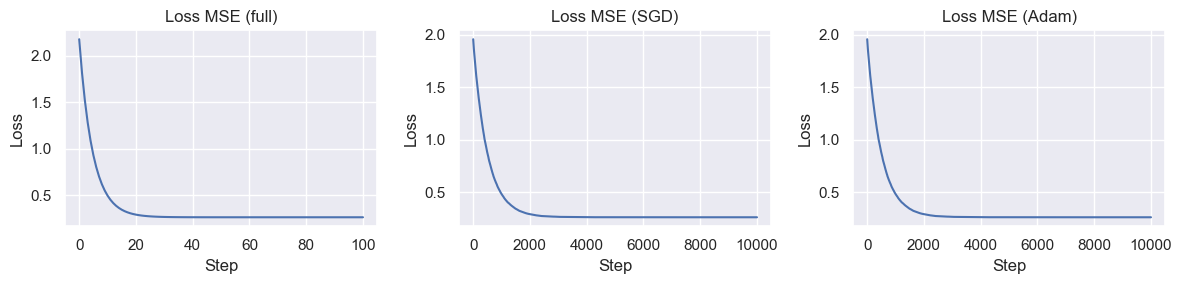

R² на тестовом датасете (full)
0.9239018937118205
R² на тестовом датасете (SGD)
0.9240472725094699
R² на тестовом датасете (Adam)
0.9239023087443137


In [514]:
regression_full = LinearRegression(
    descent_config=descent_config_full,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_full.fit(X_train, y_train)
predictions_full = regression_full.predict(X_test)

regression_stochastic = LinearRegression(
    descent_config=descent_config_stochastic,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_stochastic.fit(X_train, y_train)
predictions_stochastic = regression_stochastic.predict(X_test)


regression_adam = LinearRegression(
    descent_config=descent_config_adam,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_adam.fit(X_train, y_train)
predictions_adam = regression_adam.predict(X_test)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))  
axes[0].plot(regression_full.loss_history)
axes[0].set_title("Loss MSE (full)")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Loss")

axes[1].plot(regression_stochastic.loss_history)
axes[1].set_title("Loss MSE (SGD)")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")

axes[2].plot(regression_adam.loss_history)
axes[2].set_title("Loss MSE (Adam)")
axes[2].set_xlabel("Step")
axes[2].set_ylabel("Loss")

plt.tight_layout()
plt.show()

print('R² на тестовом датасете (full)')
print(r2_score(y_test, predictions_full))

print('R² на тестовом датасете (SGD)')
print(r2_score(y_test, predictions_stochastic))

print('R² на тестовом датасете (Adam)')
print(r2_score(y_test, predictions_adam))

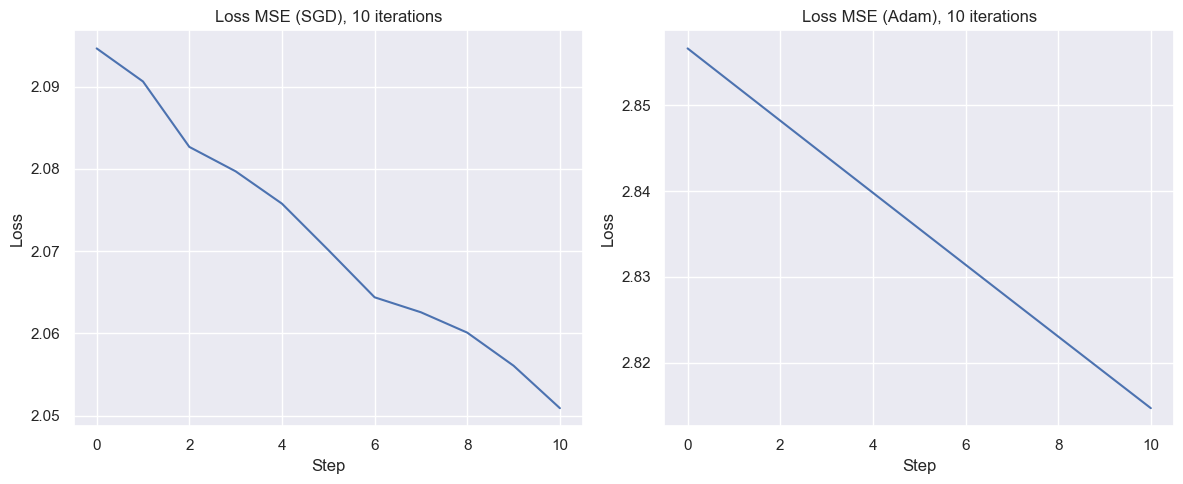

R² на тестовом датасете (SGD), 10 итераций
0.484246556672146
R² на тестовом датасете (Adam), 10 итераций
0.3069545015484184


In [507]:
regression_stochastic = LinearRegression(
    descent_config=descent_config_stochastic,
    tolerance=tolerance,
    max_iter=max_iter // 10
)

regression_stochastic.fit(X_train, y_train)
predictions_stochastic = regression_stochastic.predict(X_test)

regression_adam = LinearRegression(
    descent_config=descent_config_adam,
    tolerance=tolerance,
    max_iter=max_iter // 10
)

regression_adam.fit(X_train, y_train)
predictions_adam = regression_adam.predict(X_test)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))  
axes[0].plot(regression_stochastic.loss_history)
axes[0].set_title("Loss MSE (SGD), 10 iterations")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Loss")

axes[1].plot(regression_adam.loss_history)
axes[1].set_title("Loss MSE (Adam), 10 iterations")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")

plt.tight_layout()
plt.show()

print('R² на тестовом датасете (SGD), 10 итераций')
print(r2_score(y_test, predictions_stochastic))

print('R² на тестовом датасете (Adam), 10 итераций')
print(r2_score(y_test, predictions_adam))

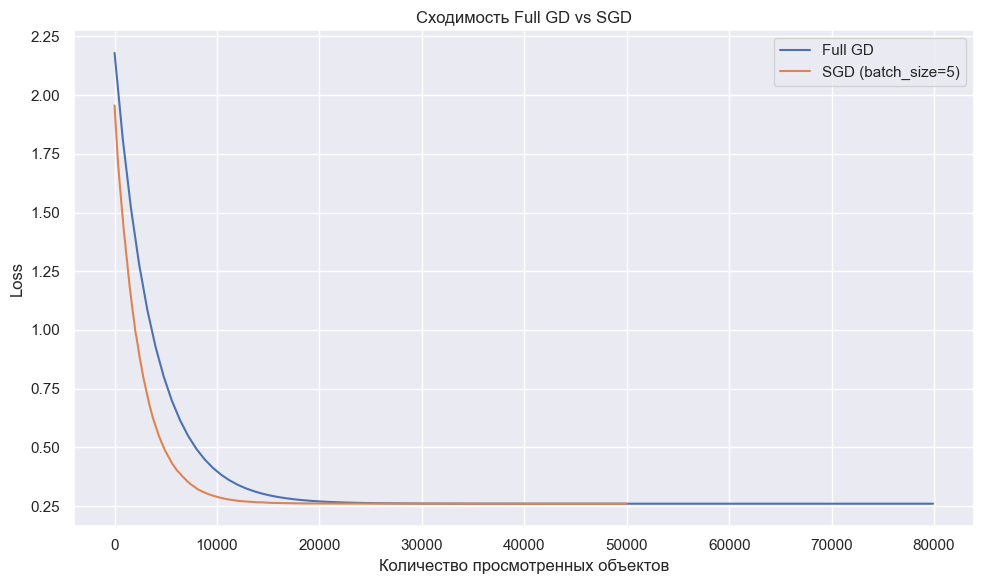

In [515]:
n_train = X_train.shape[0]
batch_size = 5

x_full = np.arange(len(regression_full.loss_history)) * n_train
x_sgd = np.arange(len(regression_stochastic.loss_history)) * batch_size

plt.figure(figsize=(10, 6))
plt.plot(x_full, regression_full.loss_history, label='Full GD')
plt.plot(x_sgd, regression_stochastic.loss_history, label='SGD (batch_size=5)')

plt.xlabel('Количество просмотренных объектов')
plt.ylabel('Loss')
plt.title('Сходимость Full GD vs SGD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Итого
1. Все три варианта (full, sgd, adam) сошлись в глобальный оптимум.
2. full сошелся за наименьшее количество итераций из все трех.
3. И adam и sgd потребовалось больше итераций, но по разным причинам:
   - Adam: шаг градиента на начальных этапах очень мал из-за
     ```new_m = self.beta_1 * self.m + (1 - self.beta_1) * gradient```
     где beta_1 близка к 1.  
     Loss убывает монотонно, но медленно.
   - SGD: шаг градиента получается более шумным (при экстремально уменьшенном размере батча (5) это видно особенно хорошо на графике loss для 10 итераций
4. Интересно то, что по количеству "эффективных итераций", (по количеству просмотренных объектов) SGD обгонял full на первых этапах (т.к. датасет простой и синтетический и глобальный оптимум есть, и функция гладкая, то все методы сошлись все равно). За 1 итерацию full "просматривает" dimension (1000) объектов, в то время как SGD только batch_size (5) объектов.

### 10.3 Плохая обусловленность матрицы признаков и разные методы градиентного спуска

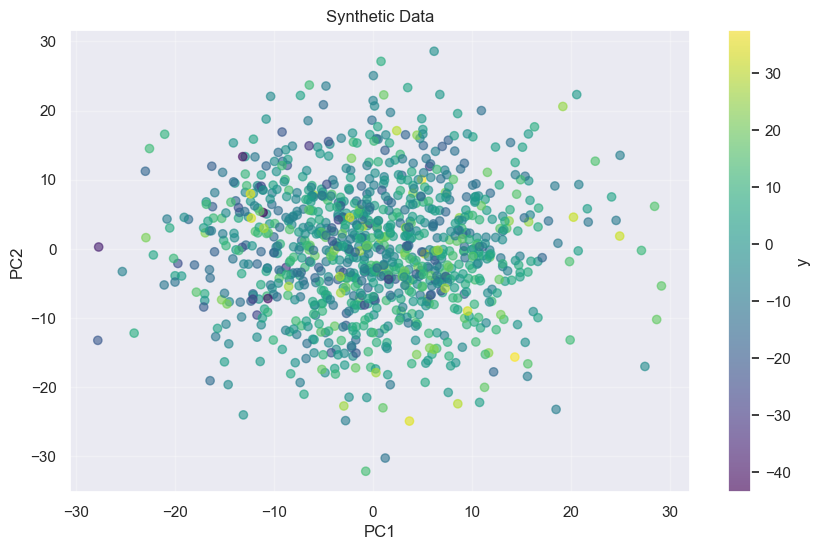

In [632]:
dg = DataGenerator(10)
ill_cond_X, ill_cond_y, true_weights = dg.generate_ill_conditioned_data(noise=0.5, condition_number=10)
dg.visualize_data(ill_cond_X, ill_cond_y)

In [633]:
dg = DataGenerator(10)
ill_cond_X, ill_cond_y, true_weights = dg.generate_ill_conditioned_data(noise=0)

X_train, X_test, y_train, y_test = train_test_split(
    ill_cond_X, ill_cond_y, test_size=0.2, random_state=42)

regression_best = LinearRegression(
    descent_config=descent_config_full,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_best.descent.w = true_weights
predictions = regression_best.predict(X_test)

print("R² на тесте с истинными весами:")
print(r2_score(y_test, predictions))

R² на тесте с истинными весами:
1.0


Также зафиксирую функцию потерь **MSE**
И сравню разные варианты градиентного спуска:
- full
- SGD
- Adam/Nadam/AdaMax/AMS

In [634]:
means_train, stds_train = np.mean(X_train, axis=0), np.std(X_train, axis=0)

X_train = (X_train - means_train) / stds_train
X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])

X_test = (X_test - means_train) / stds_train
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])

In [635]:
dimension = X_train.shape[1]
max_iter = 100
tolerance = 0

descent_config_full = {
    'descent_name': 'full',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

descent_config_stochastic = {
    'descent_name': 'stochastic',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
        'batch_size': 5
    }
}

descent_config_adam = {
    'descent_name': 'adam',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

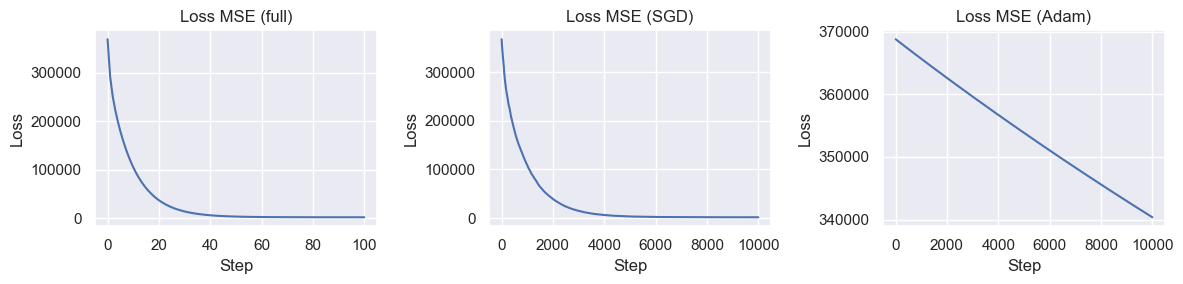

R² на тестовом датасете (full)
0.9963450822680094
R² на тестовом датасете (SGD)
0.9963314168804198
R² на тестовом датасете (Adam)
0.07518451235765666


In [636]:
regression_full = LinearRegression(
    descent_config=descent_config_full,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_full.fit(X_train, y_train)
predictions_full = regression_full.predict(X_test)

regression_stochastic = LinearRegression(
    descent_config=descent_config_stochastic,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_stochastic.fit(X_train, y_train)
predictions_stochastic = regression_stochastic.predict(X_test)


regression_adam = LinearRegression(
    descent_config=descent_config_adam,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_adam.fit(X_train, y_train)
predictions_adam = regression_adam.predict(X_test)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))  
axes[0].plot(regression_full.loss_history)
axes[0].set_title("Loss MSE (full)")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Loss")

axes[1].plot(regression_stochastic.loss_history)
axes[1].set_title("Loss MSE (SGD)")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")

axes[2].plot(regression_adam.loss_history)
axes[2].set_title("Loss MSE (Adam)")
axes[2].set_xlabel("Step")
axes[2].set_ylabel("Loss")

plt.tight_layout()
plt.show()

print('R² на тестовом датасете (full)')
print(r2_score(y_test, predictions_full))

print('R² на тестовом датасете (SGD)')
print(r2_score(y_test, predictions_stochastic))

print('R² на тестовом датасете (Adam)')
print(r2_score(y_test, predictions_adam))

А теперь на данных без нормализации

In [637]:
X_train, X_test, y_train, y_test = train_test_split(
    ill_cond_X, ill_cond_y, test_size=0.2, random_state=42)
X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])


regression_full = LinearRegression(
    descent_config=descent_config_full,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_full.fit(X_train, y_train)
predictions_full = regression_full.predict(X_test)

regression_stochastic = LinearRegression(
    descent_config=descent_config_stochastic,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_stochastic.fit(X_train, y_train)
predictions_stochastic = regression_stochastic.predict(X_test)


regression_adam = LinearRegression(
    descent_config=descent_config_adam,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_adam.fit(X_train, y_train)
predictions_adam = regression_adam.predict(X_test)


print('R² на тестовом датасете (full)')
try:
    print(r2_score(y_test, predictions_full))
except ValueError as e:
    print(e)

print('R² на тестовом датасете (SGD)')
try:
    print(r2_score(y_test, predictions_stochastic))
except ValueError as e:
    print(e)
    
print('R² на тестовом датасете (Adam)')
print(r2_score(y_test, predictions_adam))

/Users/janezaletskaya/Desktop/projects/YHB-Py/pythonProject/ml_course_hse/descents.py:55: RuntimeWarning: overflow encountered in square
  return np.mean(diff ** 2)
/Users/janezaletskaya/envs/mlenv/lib/python3.12/site-packages/numpy/core/_methods.py:118: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


R² на тестовом датасете (full)
Input contains NaN.
R² на тестовом датасете (SGD)
Input contains NaN.
R² на тестовом датасете (Adam)
0.9988661288854642


In [628]:
means_train

array([  7.92019224, -24.61324939, -12.72641507,   7.32626906,
       -11.06328959, -13.31854647,  13.38714326,  -7.50257504,
        46.2120206 , -11.48672064])

In [629]:
stds_train

array([481.5221704 , 407.36316846, 183.01656451, 452.07253689,
       206.08892771, 476.29106268, 483.46680135, 144.51896278,
       695.72842287, 373.91150096])

### Итого
Обусловленность  -- это характеристика того, насколько чувствительны решения линейной системы к малым изменениям во входных данных.

1. При нормализации признаков full и sgd хорошо сходятся в оптимум, а для adam требуется гораздо большее количество итераций
2. При отсутствии нормализации adam быстро сходится, т.к. подбирается адаптивно коэффициент шага градиентного спуска (lr) в зависимости от масштаба признаков (т.е. проводит нормализацию под капотом)
3. В отсутствии нормализации у full и sgd происходит взрыв градиента и переполнение, что приводит к NaN в весах моделей:
   Если признаки сильно различаются по масштабу (а они отличаются), то одни направления в пространстве дают сильный вклад в Xw, а другие почти никак не влияют, X.T@X становится почти вырожденной.
4. Хорошее решение: не забывать скейлить данные перед подачей в линейные модели или использовать Adam и подобные адаптивные методы, плохое решение: просто добавить регуляризацию, которая будет препятствовать переполнению и бесконтрольному росту модулей компонент вектора весов (однако, это не решит проблему, а только вылечит симптом) 

### 10.4 Ограничения линейной регрессии

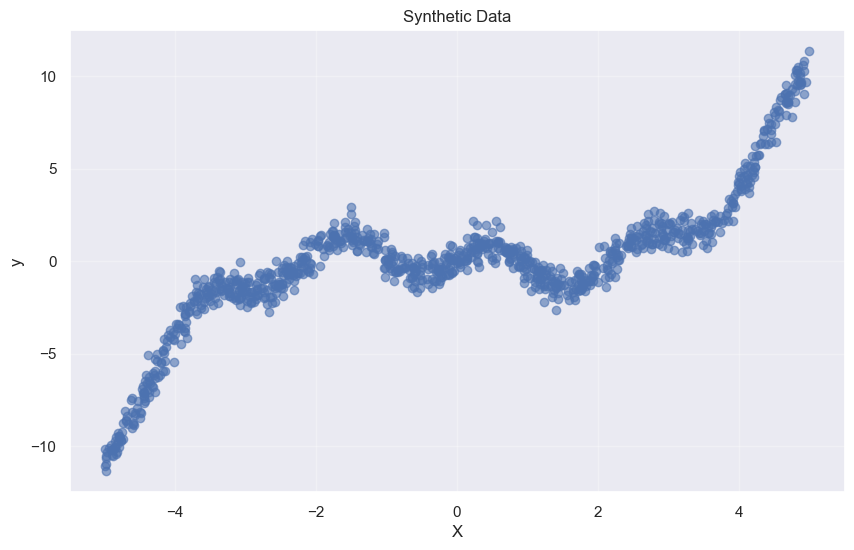

In [666]:
dg = DataGenerator(55)

local_opt_X, local_opt_y, = dg.generate_nonlinear_data(noise=0.5)
dg.visualize_data(local_opt_X, local_opt_y)

In [667]:
X_train, X_test, y_train, y_test = train_test_split(
    local_opt_X, local_opt_y, test_size=0.2, random_state=42)

means_train, stds_train = np.mean(X_train, axis=0), np.std(X_train, axis=0)

X_train = (X_train - means_train) / stds_train
X_train = np.column_stack([np.ones(X_train.shape[0]), X_train])

X_test = (X_test - means_train) / stds_train
X_test = np.column_stack([np.ones(X_test.shape[0]), X_test])

In [676]:
dimension = X_train.shape[1]
max_iter = 100
tolerance = 0

descent_config_full = {
    'descent_name': 'full',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

descent_config_stochastic = {
    'descent_name': 'stochastic',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
        'batch_size': 5
    }
}

descent_config_adam = {
    'descent_name': 'adam',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

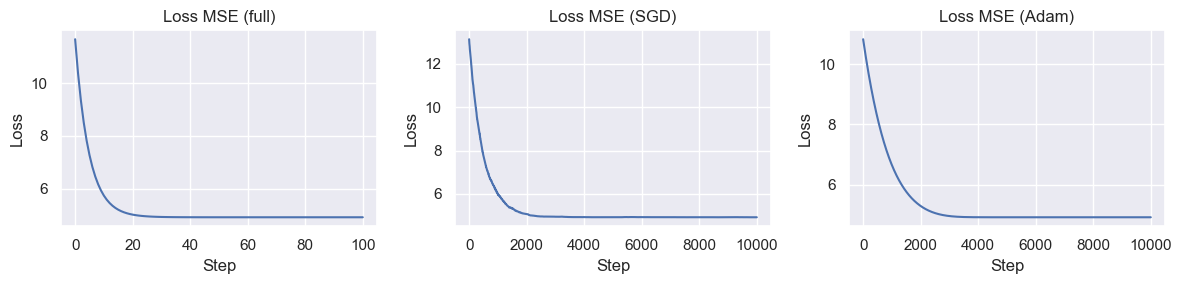

R² на тестовом датасете (full)
0.6303378559290334
R² на тестовом датасете (SGD)
0.630049463008891
R² на тестовом датасете (Adam)
0.6303369934370345


In [669]:
regression_full = LinearRegression(
    descent_config=descent_config_full,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_full.fit(X_train, y_train)
predictions_full = regression_full.predict(X_test)

regression_stochastic = LinearRegression(
    descent_config=descent_config_stochastic,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_stochastic.fit(X_train, y_train)
predictions_stochastic = regression_stochastic.predict(X_test)


regression_adam = LinearRegression(
    descent_config=descent_config_adam,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_adam.fit(X_train, y_train)
predictions_adam = regression_adam.predict(X_test)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))  
axes[0].plot(regression_full.loss_history)
axes[0].set_title("Loss MSE (full)")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Loss")

axes[1].plot(regression_stochastic.loss_history)
axes[1].set_title("Loss MSE (SGD)")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")

axes[2].plot(regression_adam.loss_history)
axes[2].set_title("Loss MSE (Adam)")
axes[2].set_xlabel("Step")
axes[2].set_ylabel("Loss")

plt.tight_layout()
plt.show()

print('R² на тестовом датасете (full)')
print(r2_score(y_test, predictions_full))

print('R² на тестовом датасете (SGD)')
print(r2_score(y_test, predictions_stochastic))

print('R² на тестовом датасете (Adam)')
print(r2_score(y_test, predictions_adam))

### Итого
1. Обучение линейной регресии на MSE в любом случае выпуклая задача и оптимум будет найден (в случае нормального количества шагов спуска)
2. Линейная регрессия моделирует линейные зависимости. В данном примере зависимость была нелинейна и это не лечится никакими методами градиентного спуска и/или функциями потерь, только feature engineering

Добавим в матрицу признаков новые столбцы

In [680]:
x1 = X_train[:, 1]
x1_sin = np.sin(x1)
x1_cubed = x1 ** 3

X_augmented_train = np.column_stack([X_train, x1_sin, x1_cubed])

x1_test = X_test[:, 1]
x1_sin_test = np.sin(x1_test)
x1_cubed_test = x1_test ** 3

X_augmented_test = np.column_stack([X_test, x1_sin_test, x1_cubed_test])

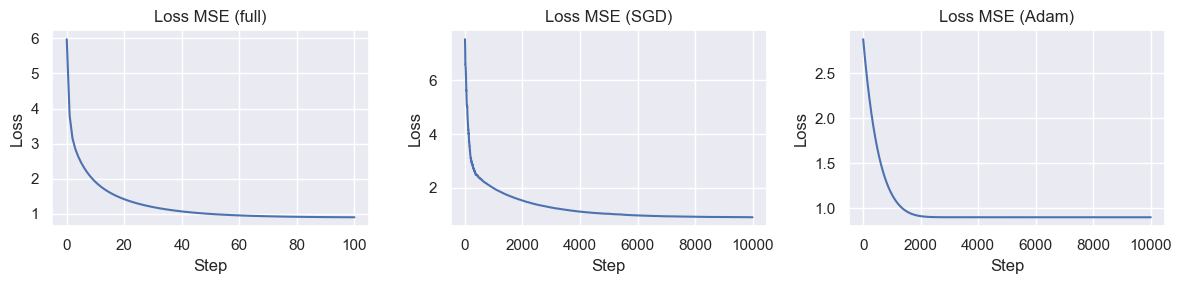

R² на тестовом датасете (full)
0.9178215201604025
R² на тестовом датасете (SGD)
0.9177356806451047
R² на тестовом датасете (Adam)
0.9170916810224692


In [681]:
dimension = X_augmented_train.shape[1]
max_iter = 100
tolerance = 0

descent_config_full = {
    'descent_name': 'full',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

descent_config_stochastic = {
    'descent_name': 'stochastic',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
        'batch_size': 5
    }
}

descent_config_adam = {
    'descent_name': 'adam',
    'loss_function': LossFunction.MSE,
    'kwargs': {
        'dimension': dimension,
    }
}

regression_full = LinearRegression(
    descent_config=descent_config_full,
    tolerance=tolerance,
    max_iter=max_iter
)

regression_full.fit(X_augmented_train, y_train)
predictions_full = regression_full.predict(X_augmented_test)

regression_stochastic = LinearRegression(
    descent_config=descent_config_stochastic,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_stochastic.fit(X_augmented_train, y_train)
predictions_stochastic = regression_stochastic.predict(X_augmented_test)


regression_adam = LinearRegression(
    descent_config=descent_config_adam,
    tolerance=tolerance,
    max_iter=max_iter * 100
)

regression_adam.fit(X_augmented_train, y_train)
predictions_adam = regression_adam.predict(X_augmented_test)


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))  
axes[0].plot(regression_full.loss_history)
axes[0].set_title("Loss MSE (full)")
axes[0].set_xlabel("Step")
axes[0].set_ylabel("Loss")

axes[1].plot(regression_stochastic.loss_history)
axes[1].set_title("Loss MSE (SGD)")
axes[1].set_xlabel("Step")
axes[1].set_ylabel("Loss")

axes[2].plot(regression_adam.loss_history)
axes[2].set_title("Loss MSE (Adam)")
axes[2].set_xlabel("Step")
axes[2].set_ylabel("Loss")

plt.tight_layout()
plt.show()

print('R² на тестовом датасете (full)')
print(r2_score(y_test, predictions_full))

print('R² на тестовом датасете (SGD)')
print(r2_score(y_test, predictions_stochastic))

print('R² на тестовом датасете (Adam)')
print(r2_score(y_test, predictions_adam))